it creates a boxplot of all the attributes in the melted DataFrame.

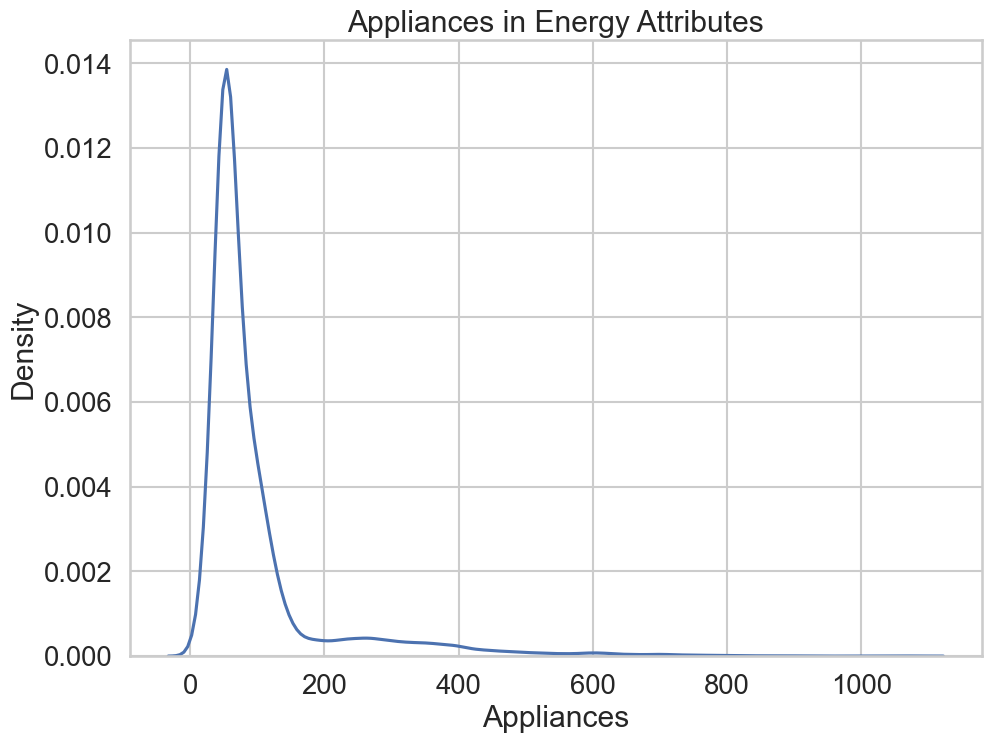

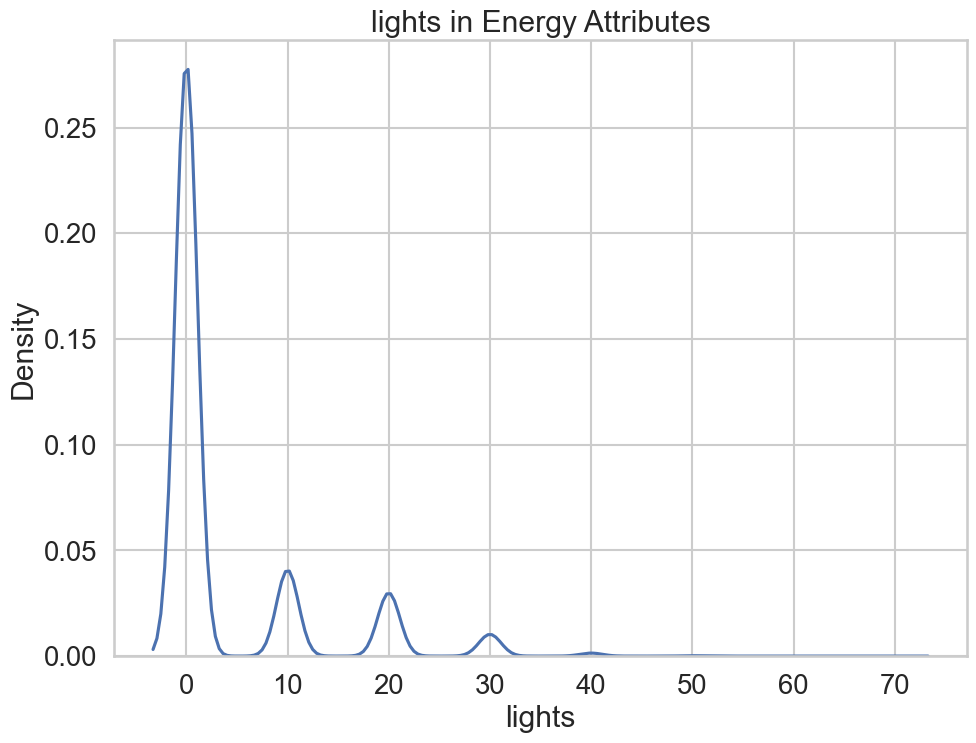

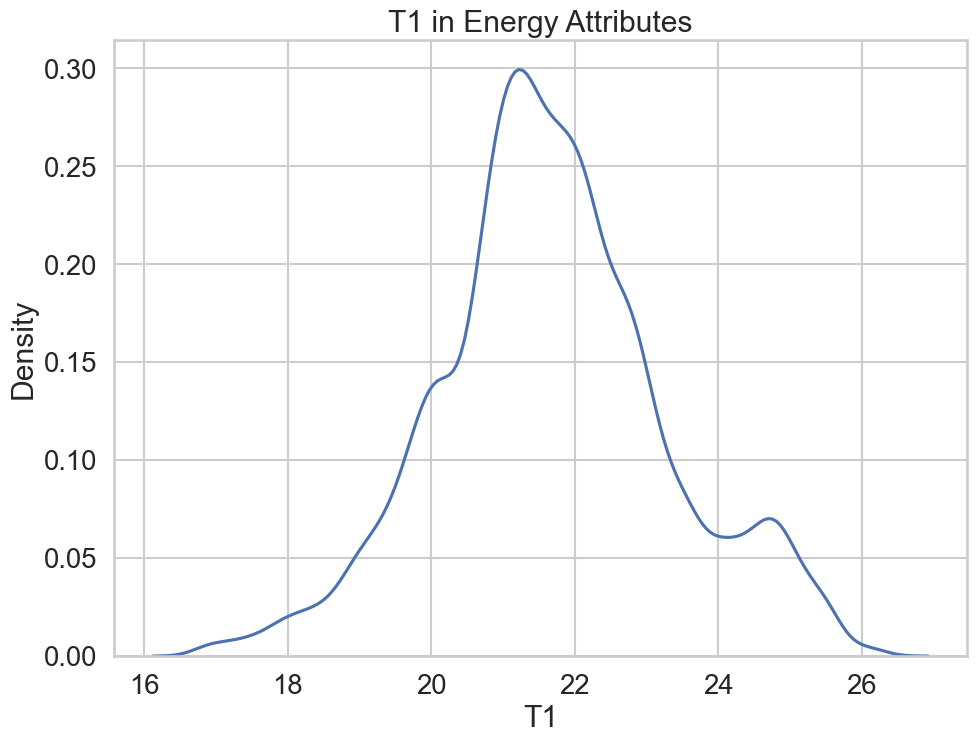

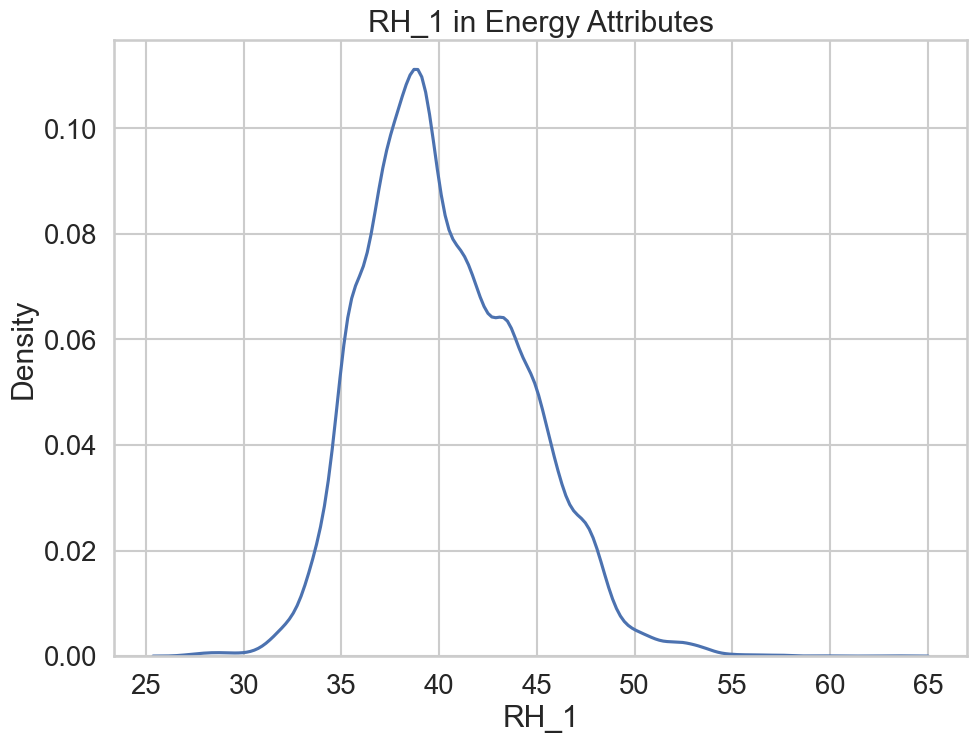

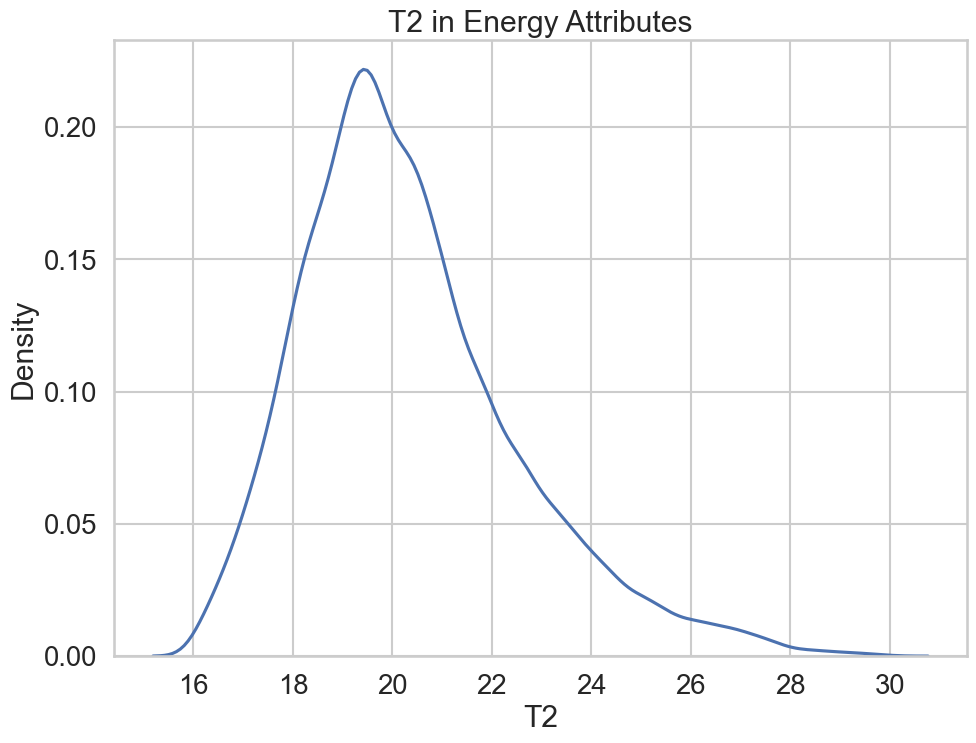

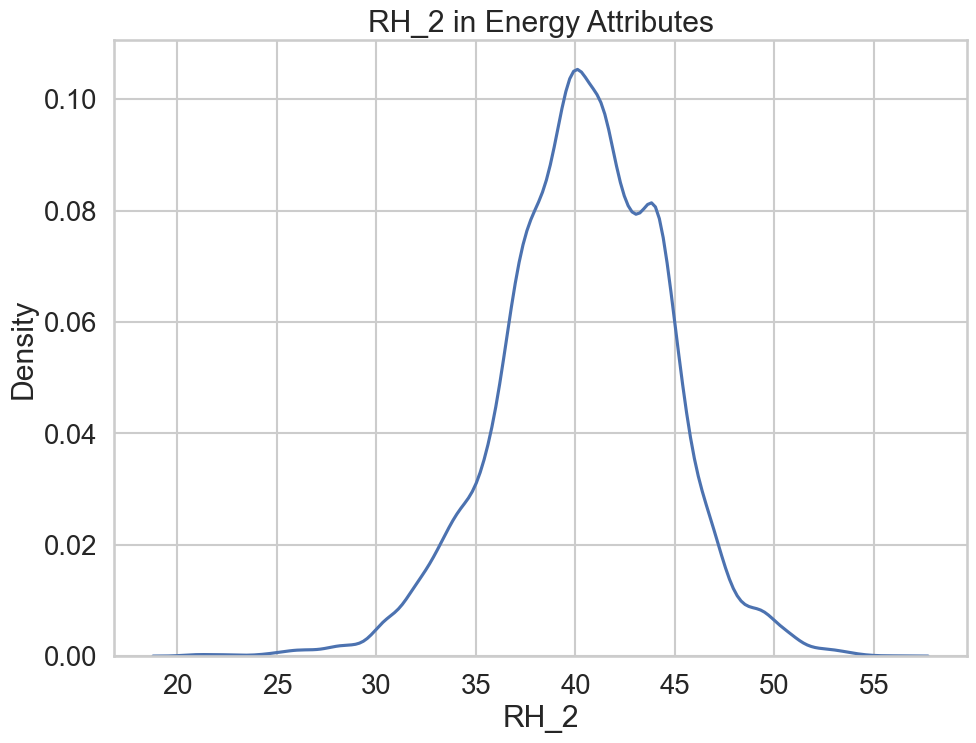

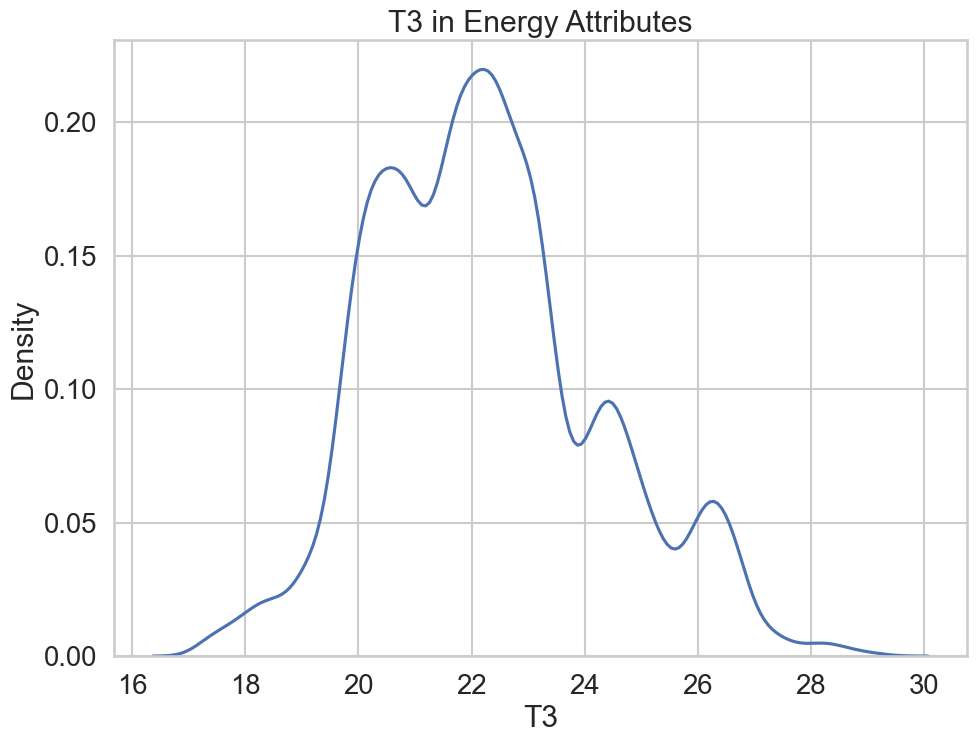

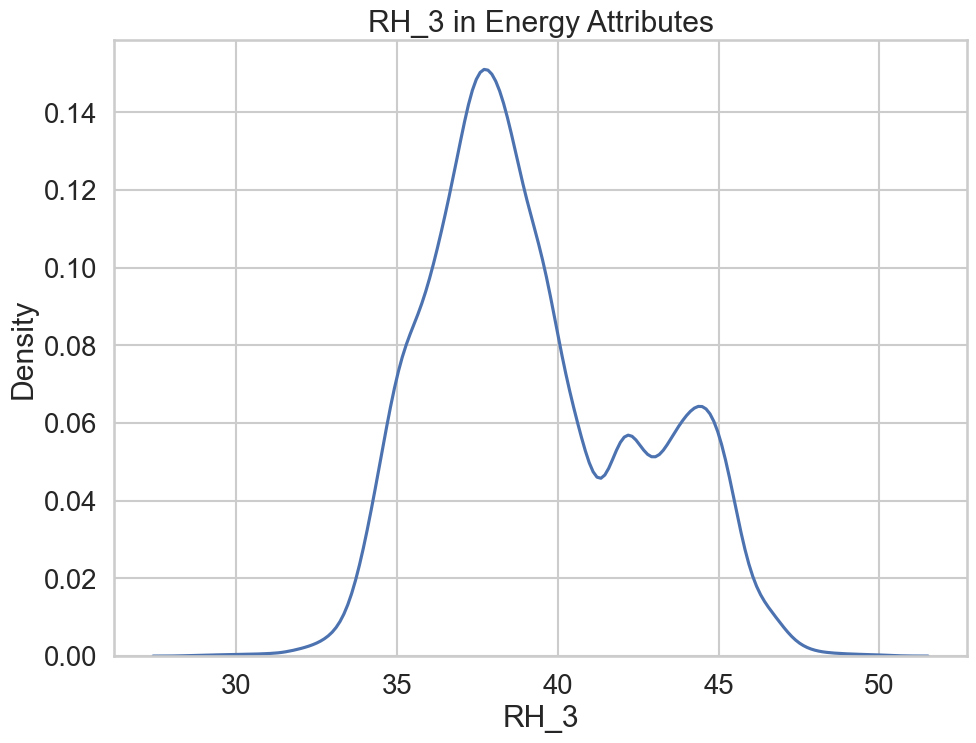

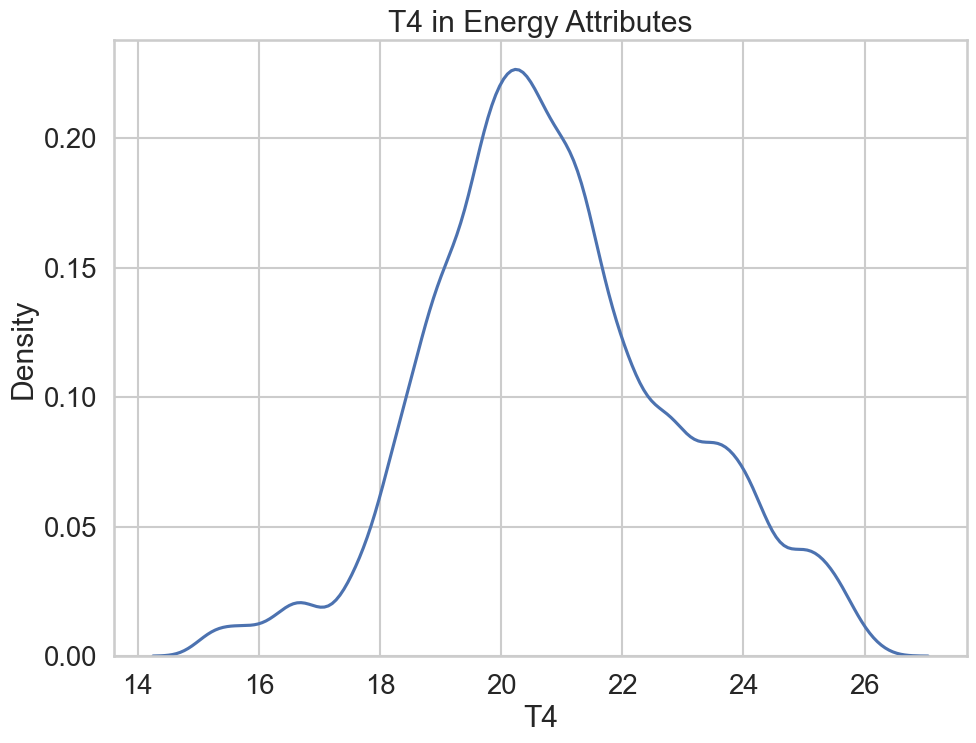

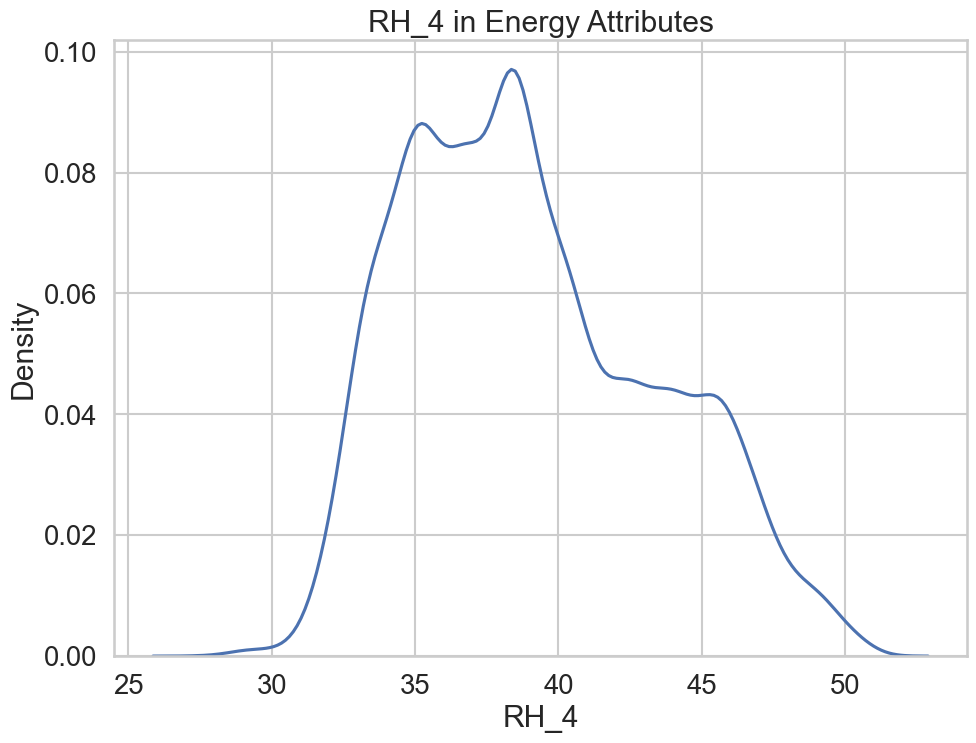

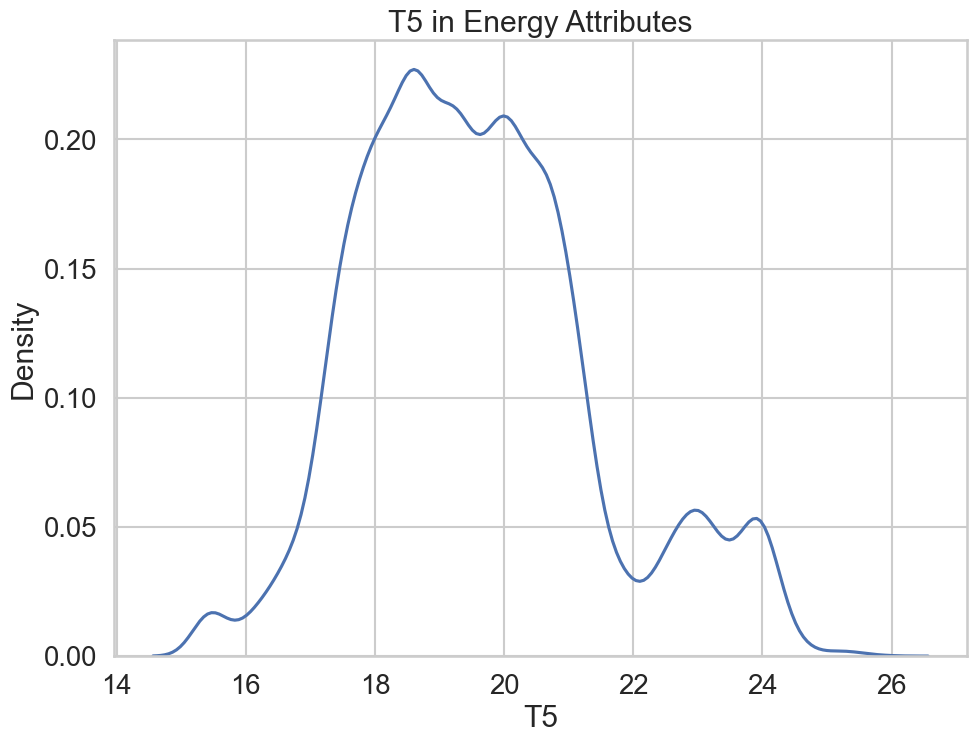

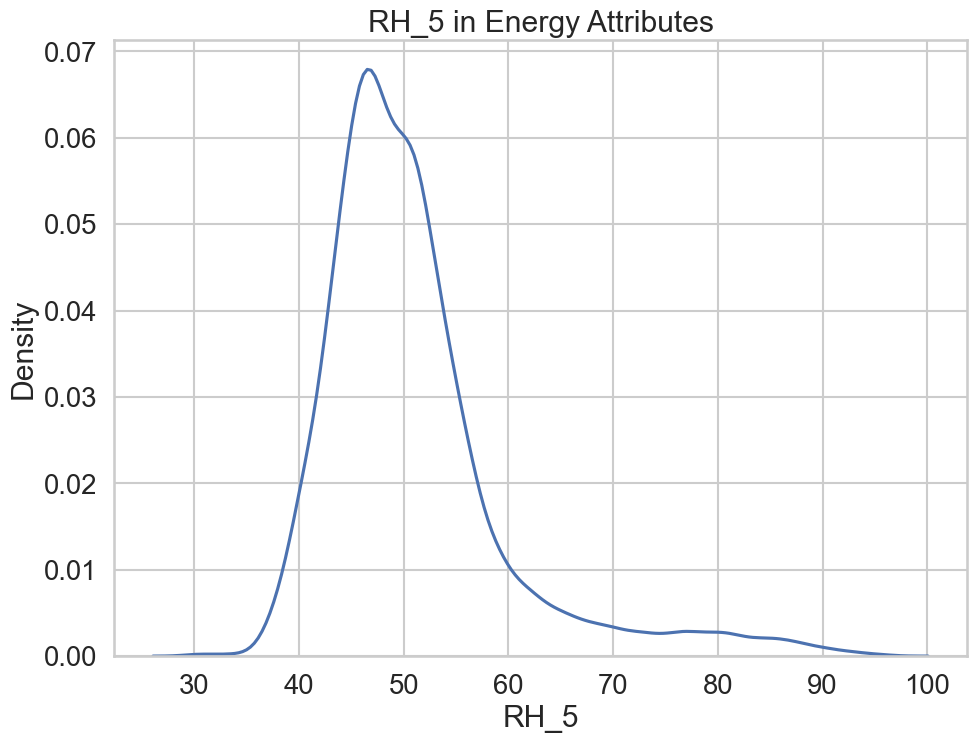

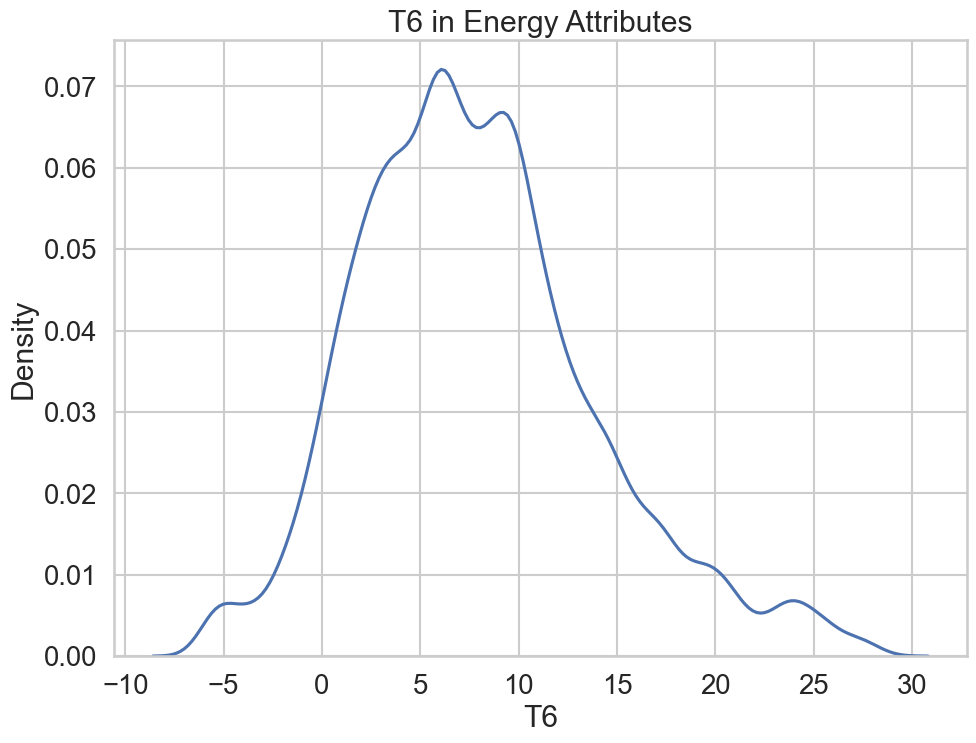

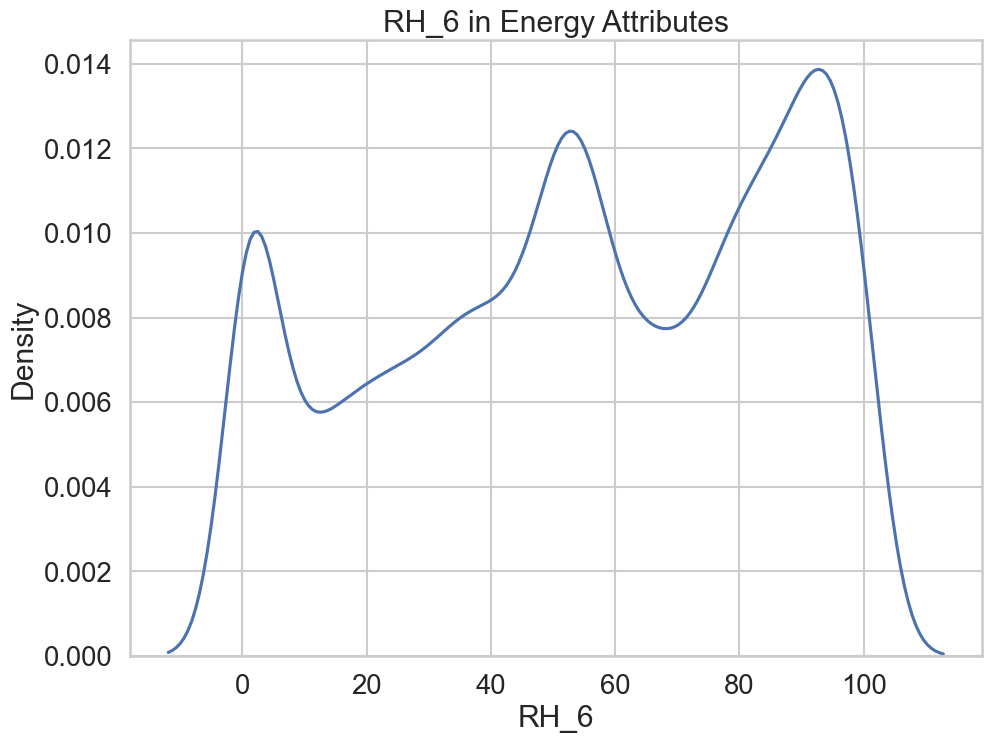

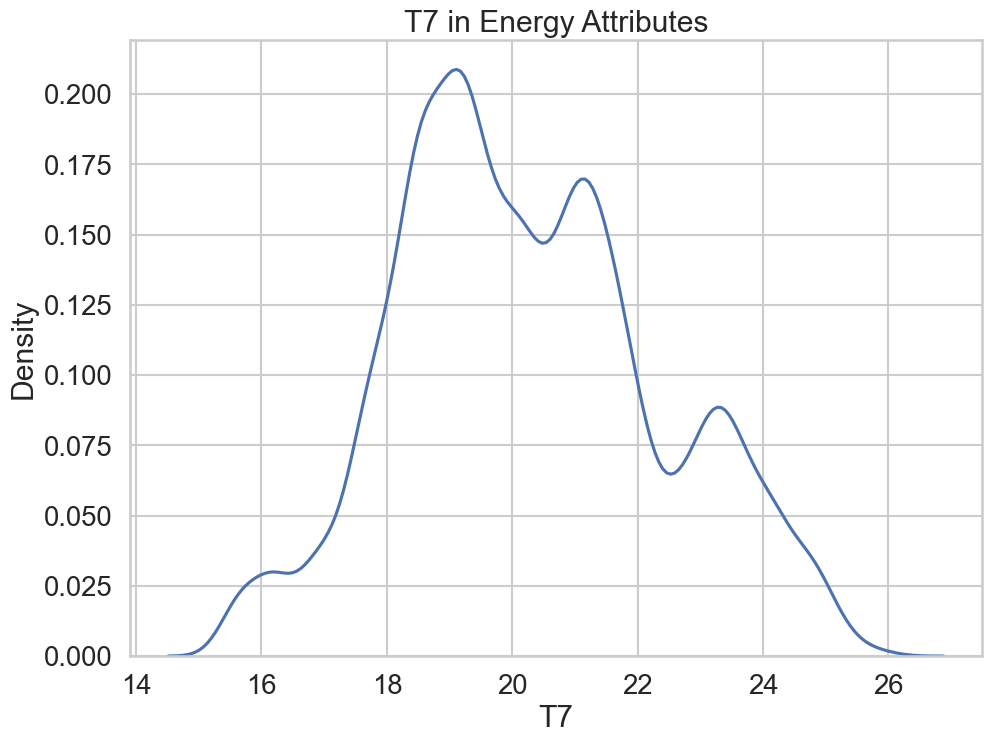

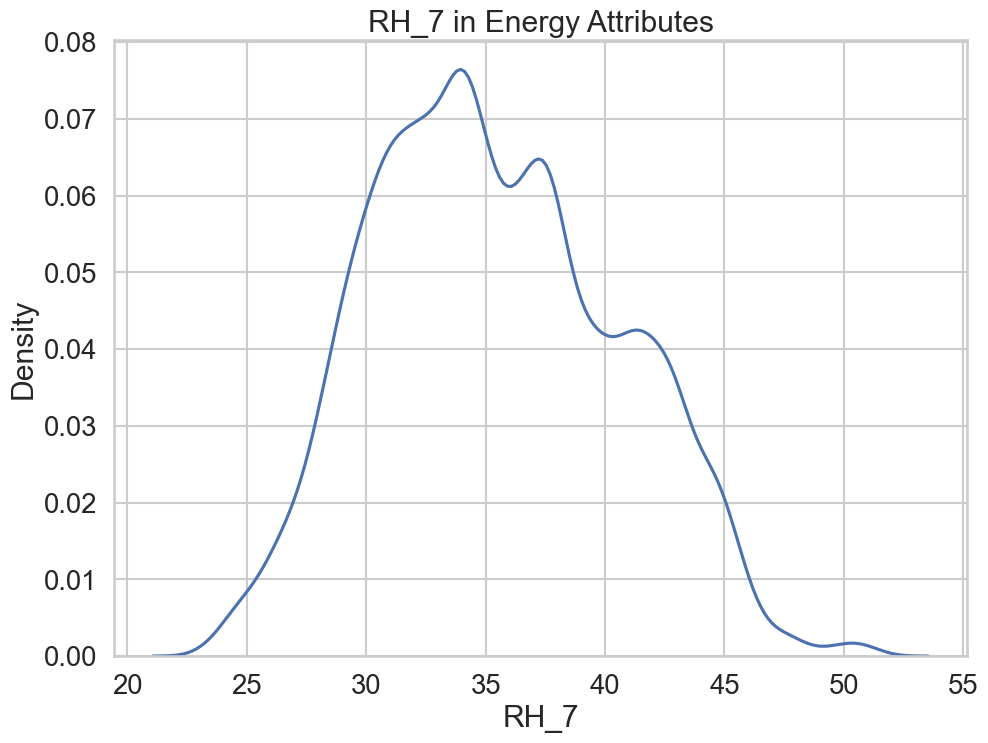

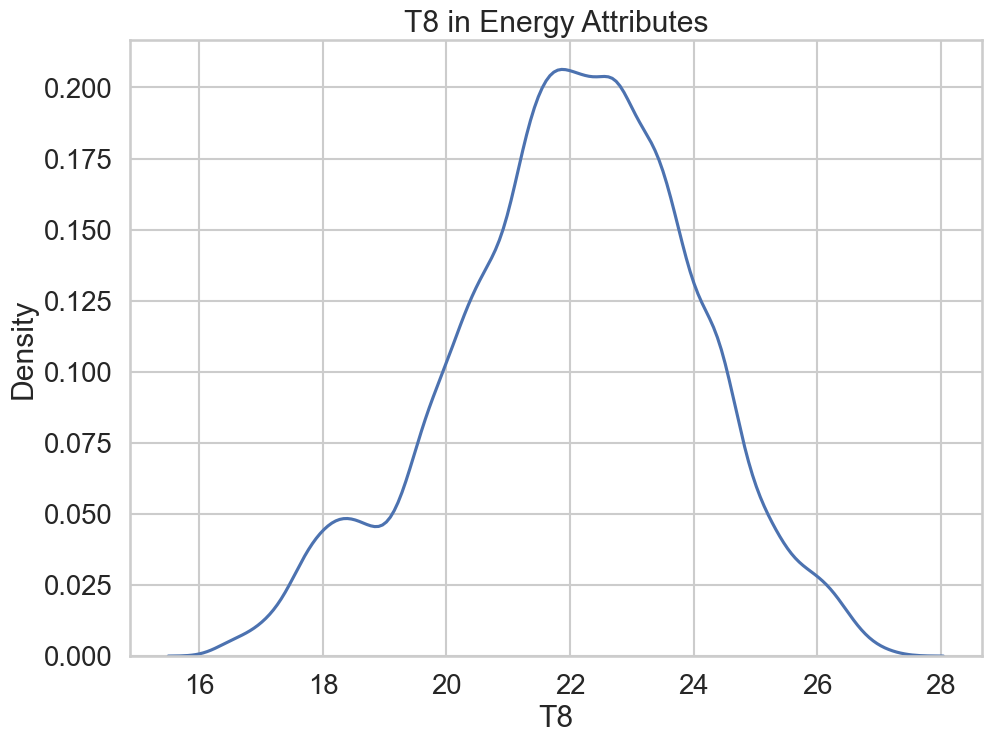

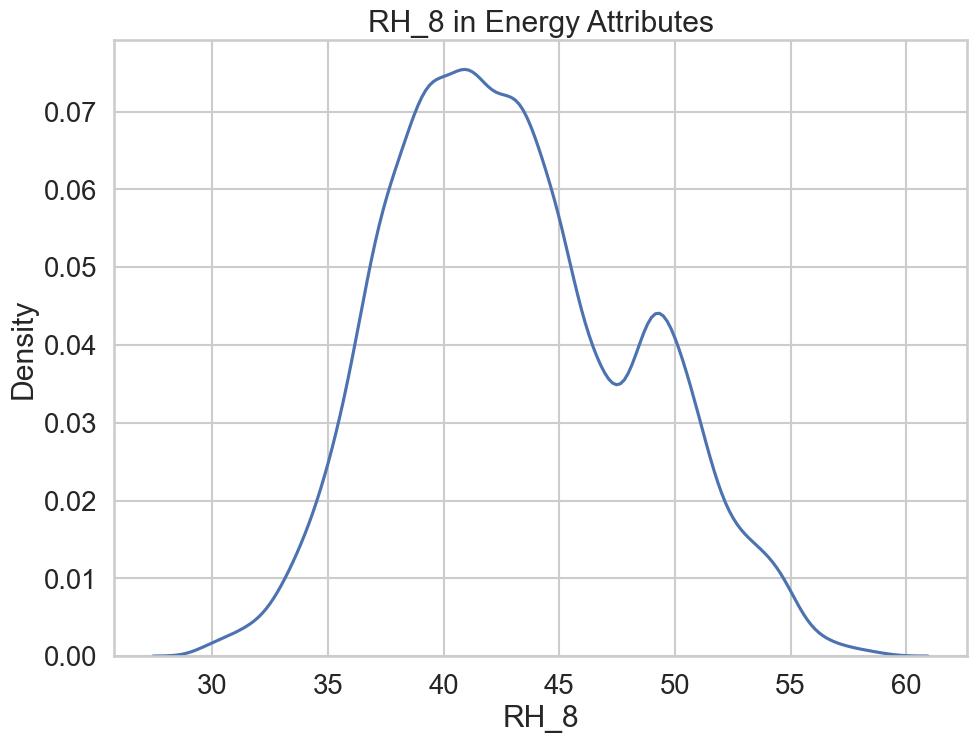

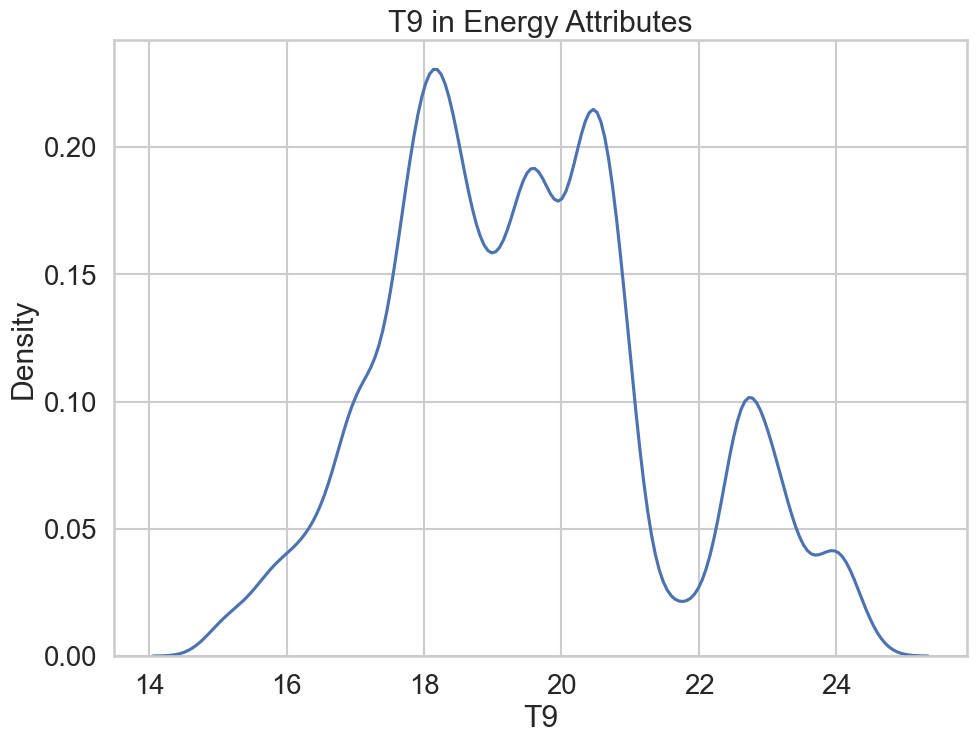

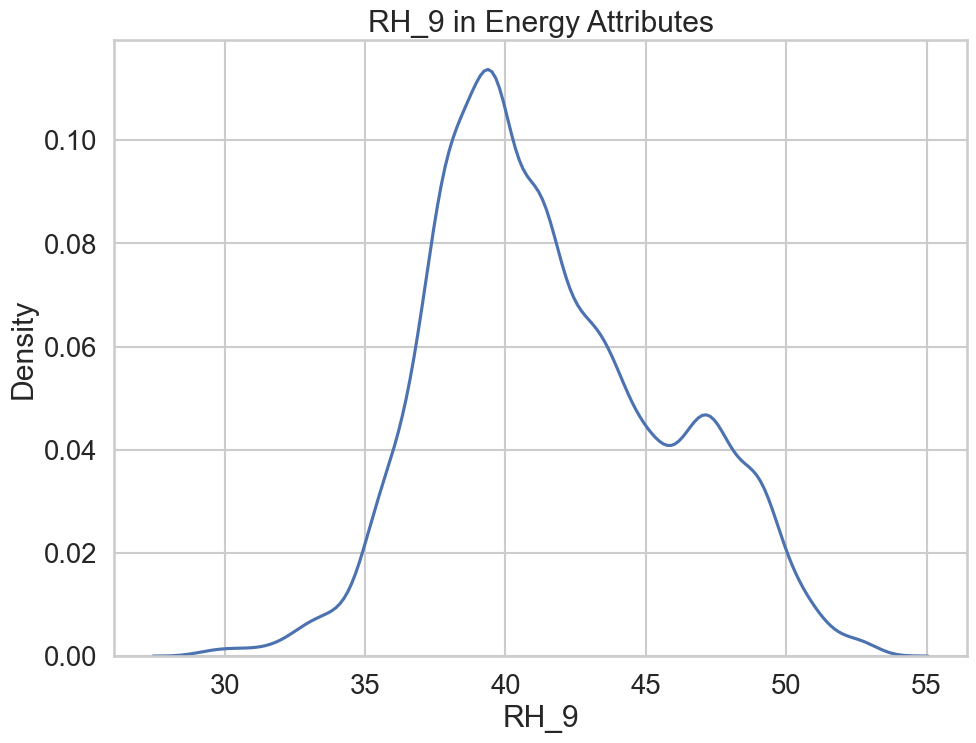

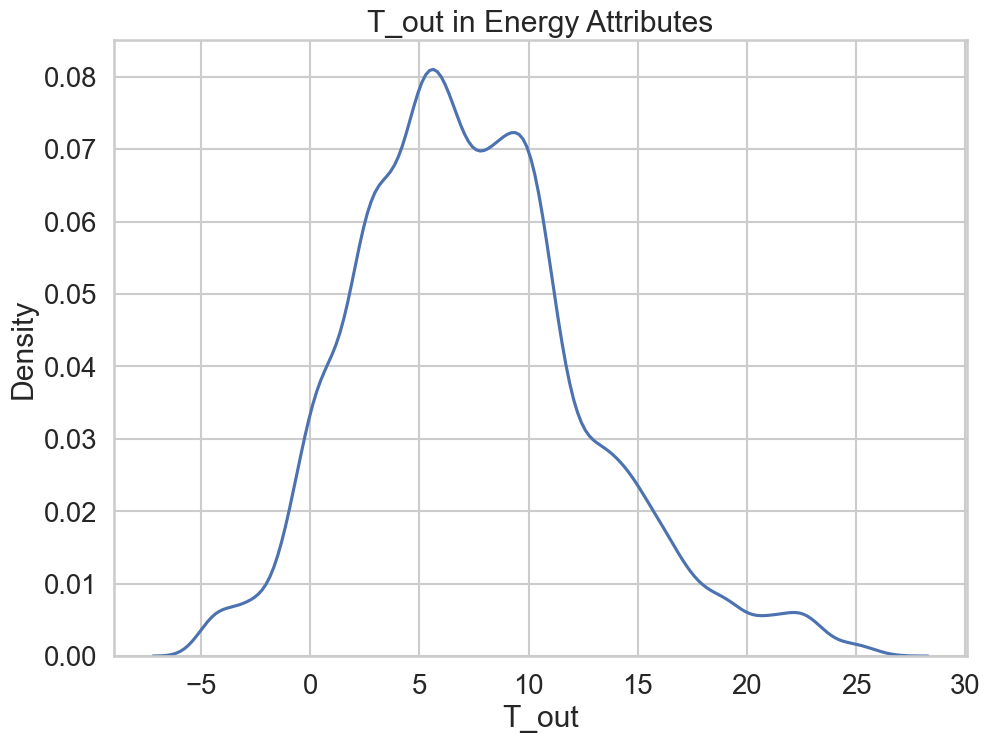

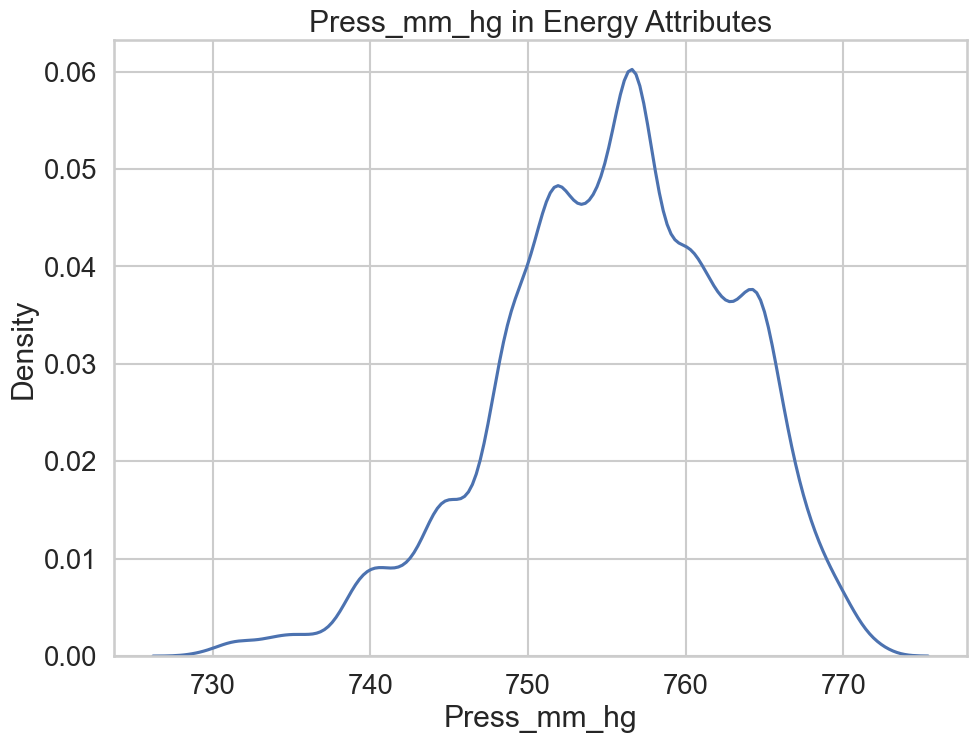

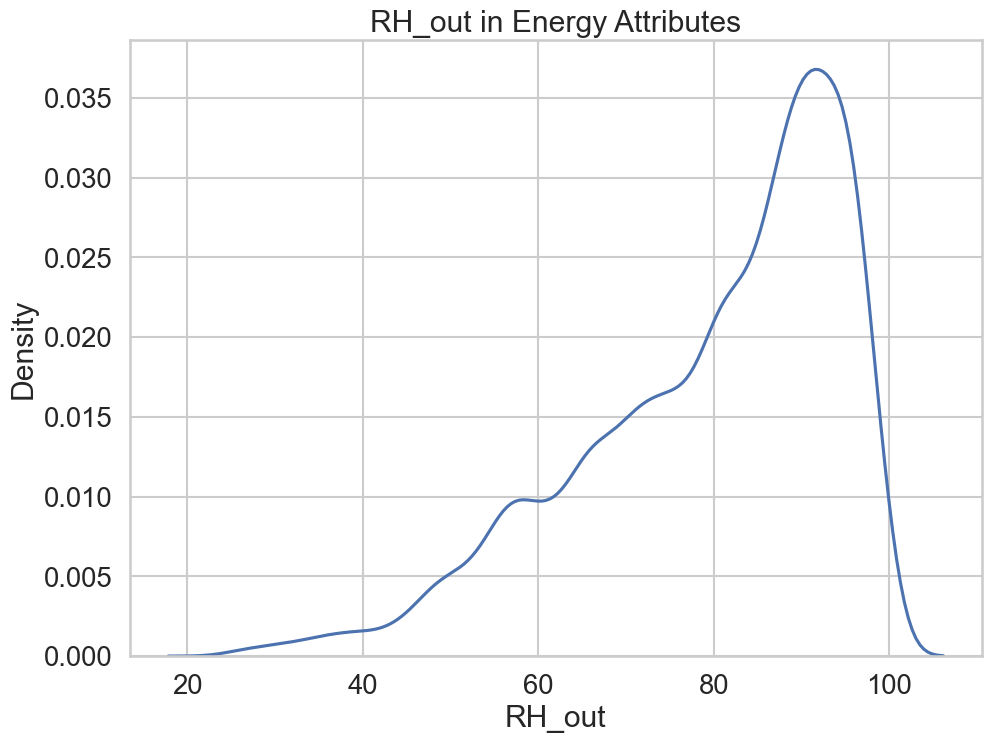

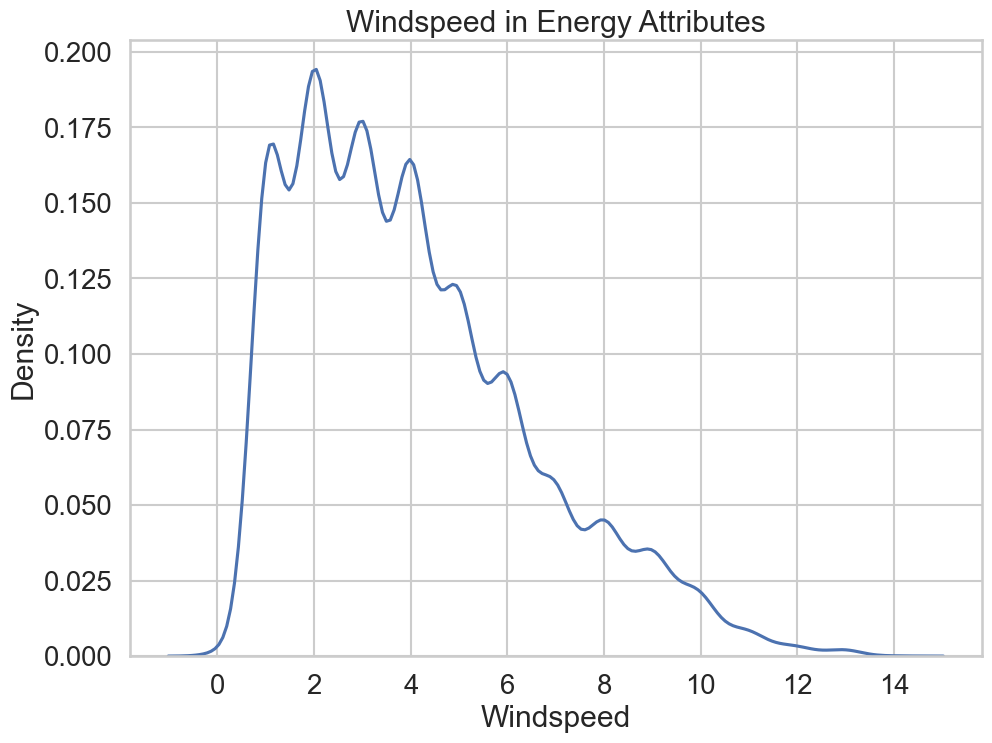

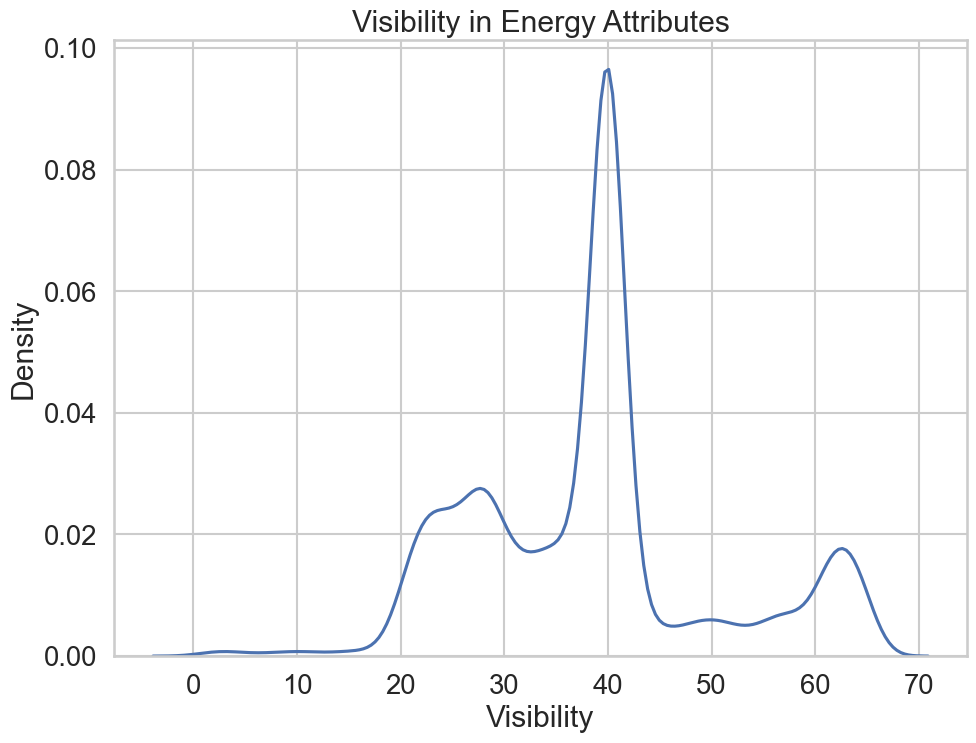

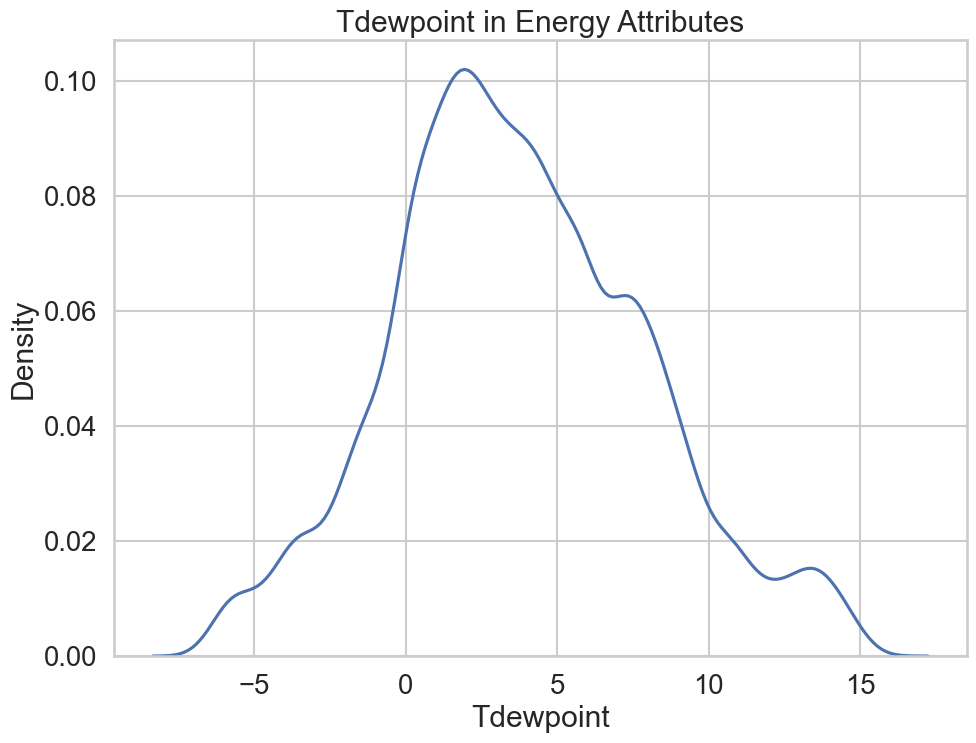

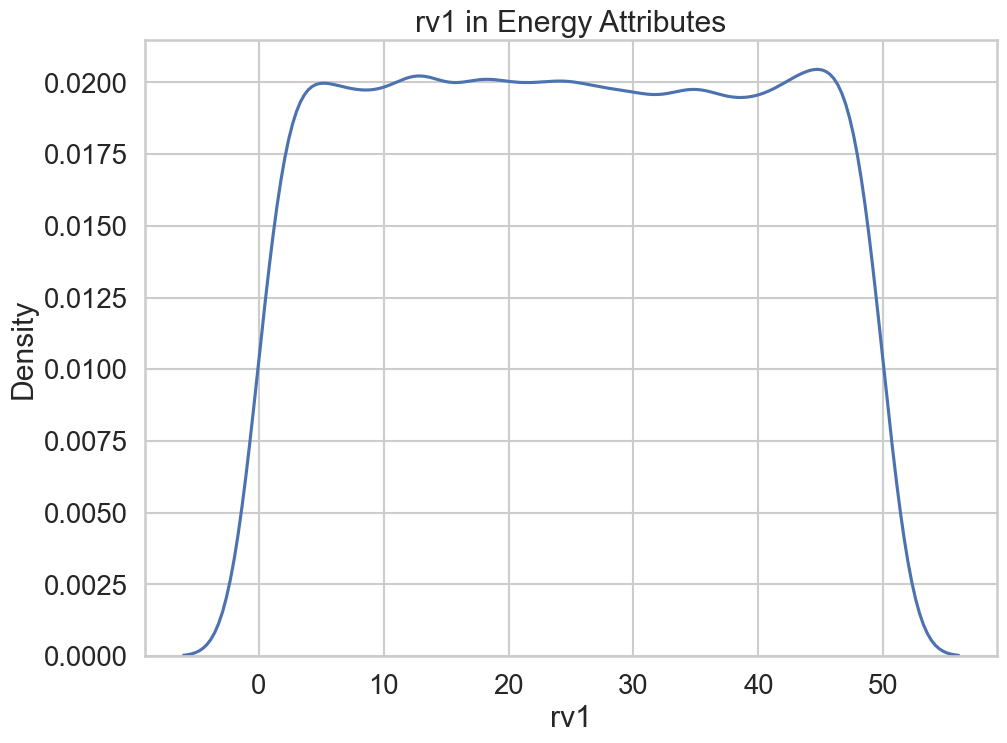

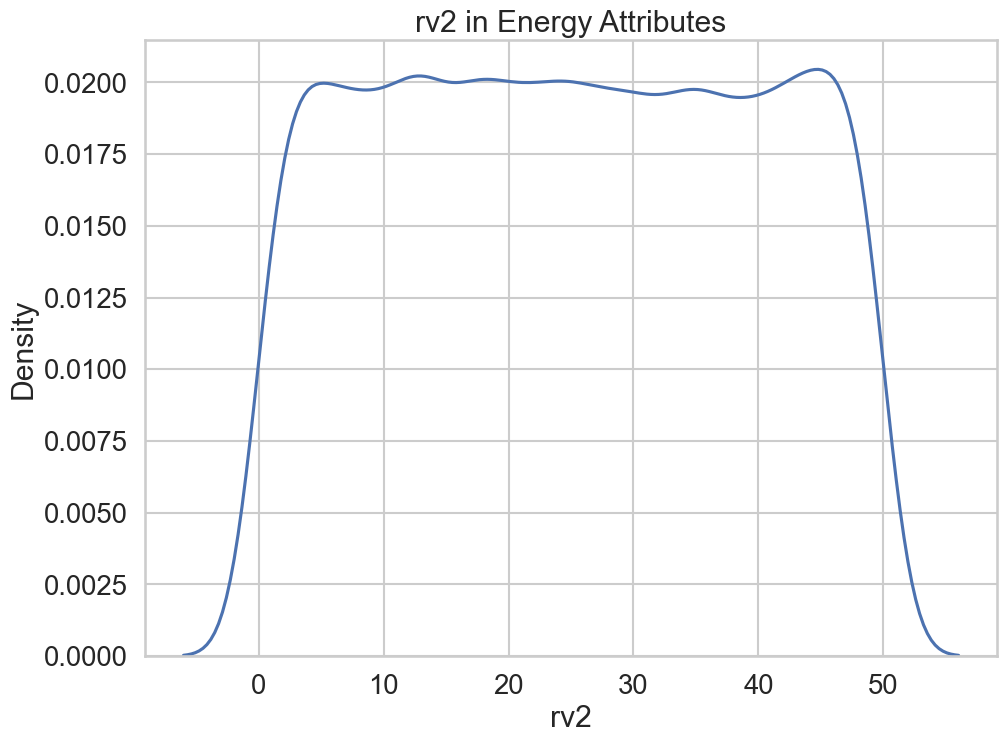

In [110]:
for col in df.columns:
    plt.figure(figsize=(11, 8))
    ax = sns.kdeplot(df[col])
    ax.set_title(col+ ' in Energy Attributes')
    plt.show()

This code snippet is used to create kernel density estimation (KDE) plots for each column in a given dataframe using the Python libraries pandas and seaborn.

The for loop iterates through each column in the dataframe df.

Within the loop, a new figure is created using plt.figure(figsize=(11, 8)), which sets the size of the figure to be 11 inches wide and 8 inches tall.

Next, seaborn's kdeplot() function is used to create a KDE plot of the values in the current column. The df[col] argument specifies the column to be plotted. The resulting plot is stored in the variable ax.

The ax.set_title() function is used to set the title of the plot to the current column name plus the phrase 'in Energy Attributes'.

Finally, plt.show() is used to display the plot. This process is repeated for each column in the dataframe, resulting in a separate KDE plot for each column.

KDE plots are a type of plot used to estimate the probability density function of a random variable. They are similar to histograms, but are smoother and can provide more information about the underlying distribution of the data.

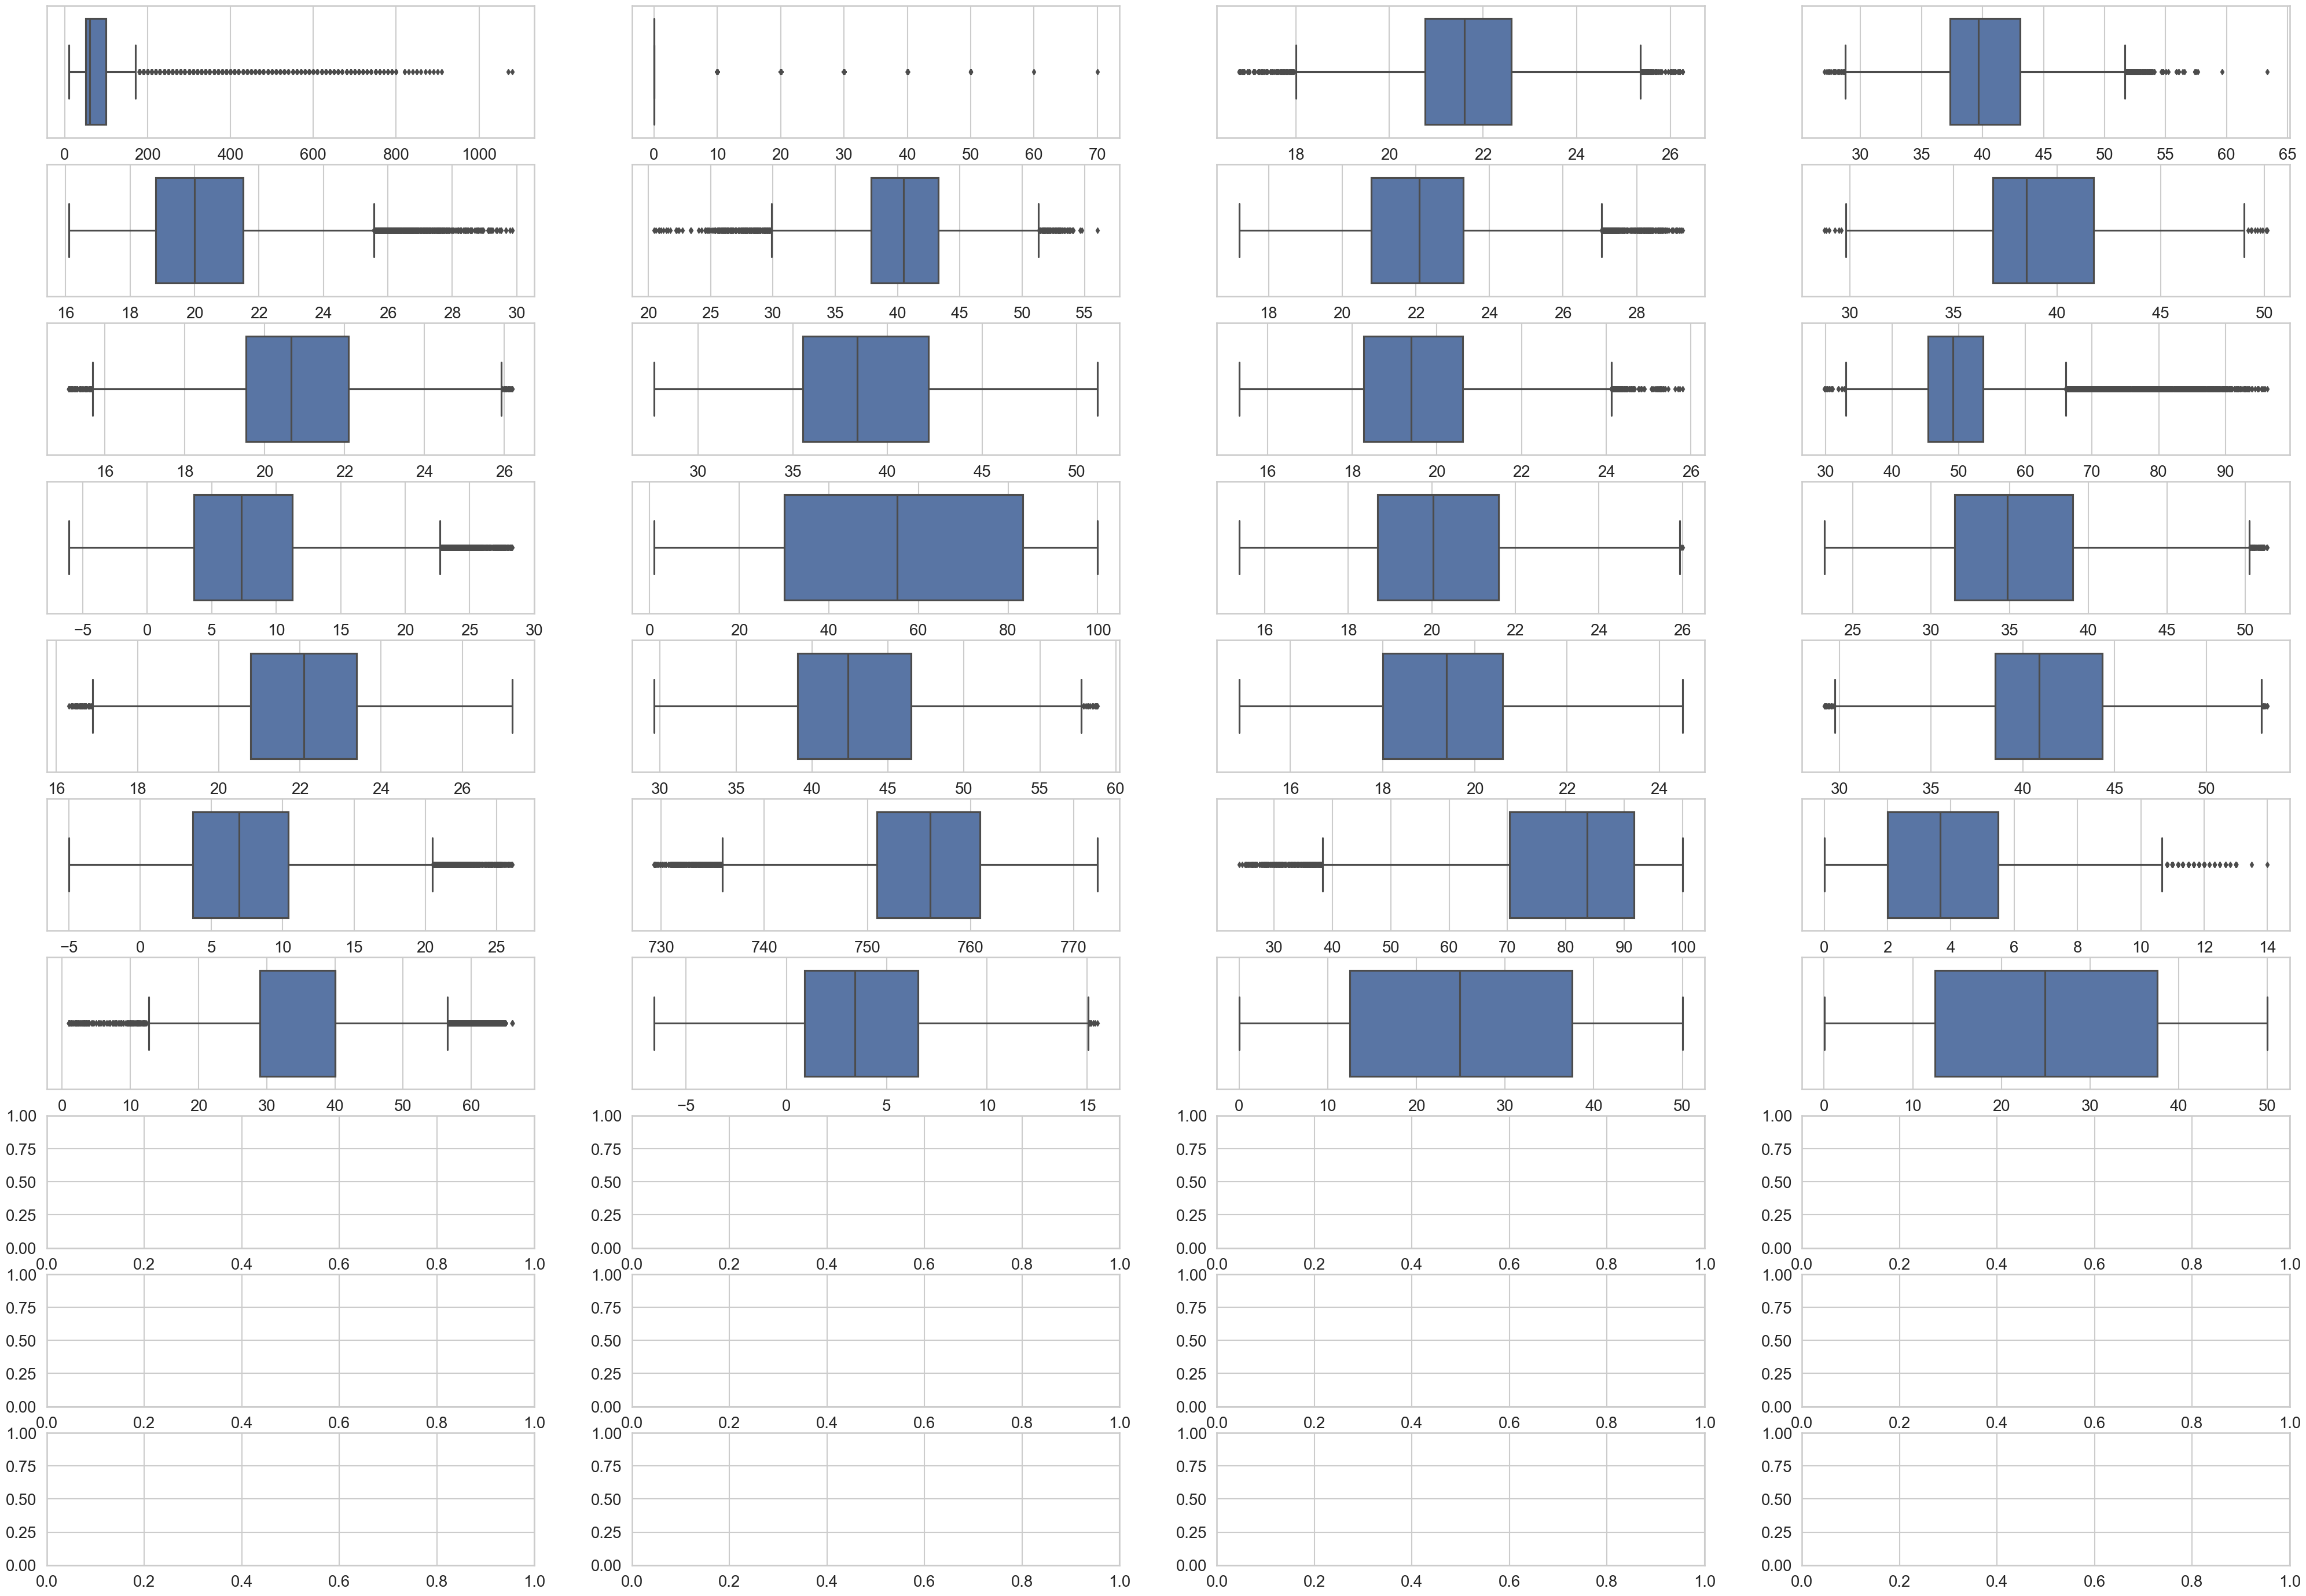

In [111]:
fig, axs = plt.subplots(10, 4, figsize=(50, 35))
axs = axs.flatten()
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axs[i])
plt.show()

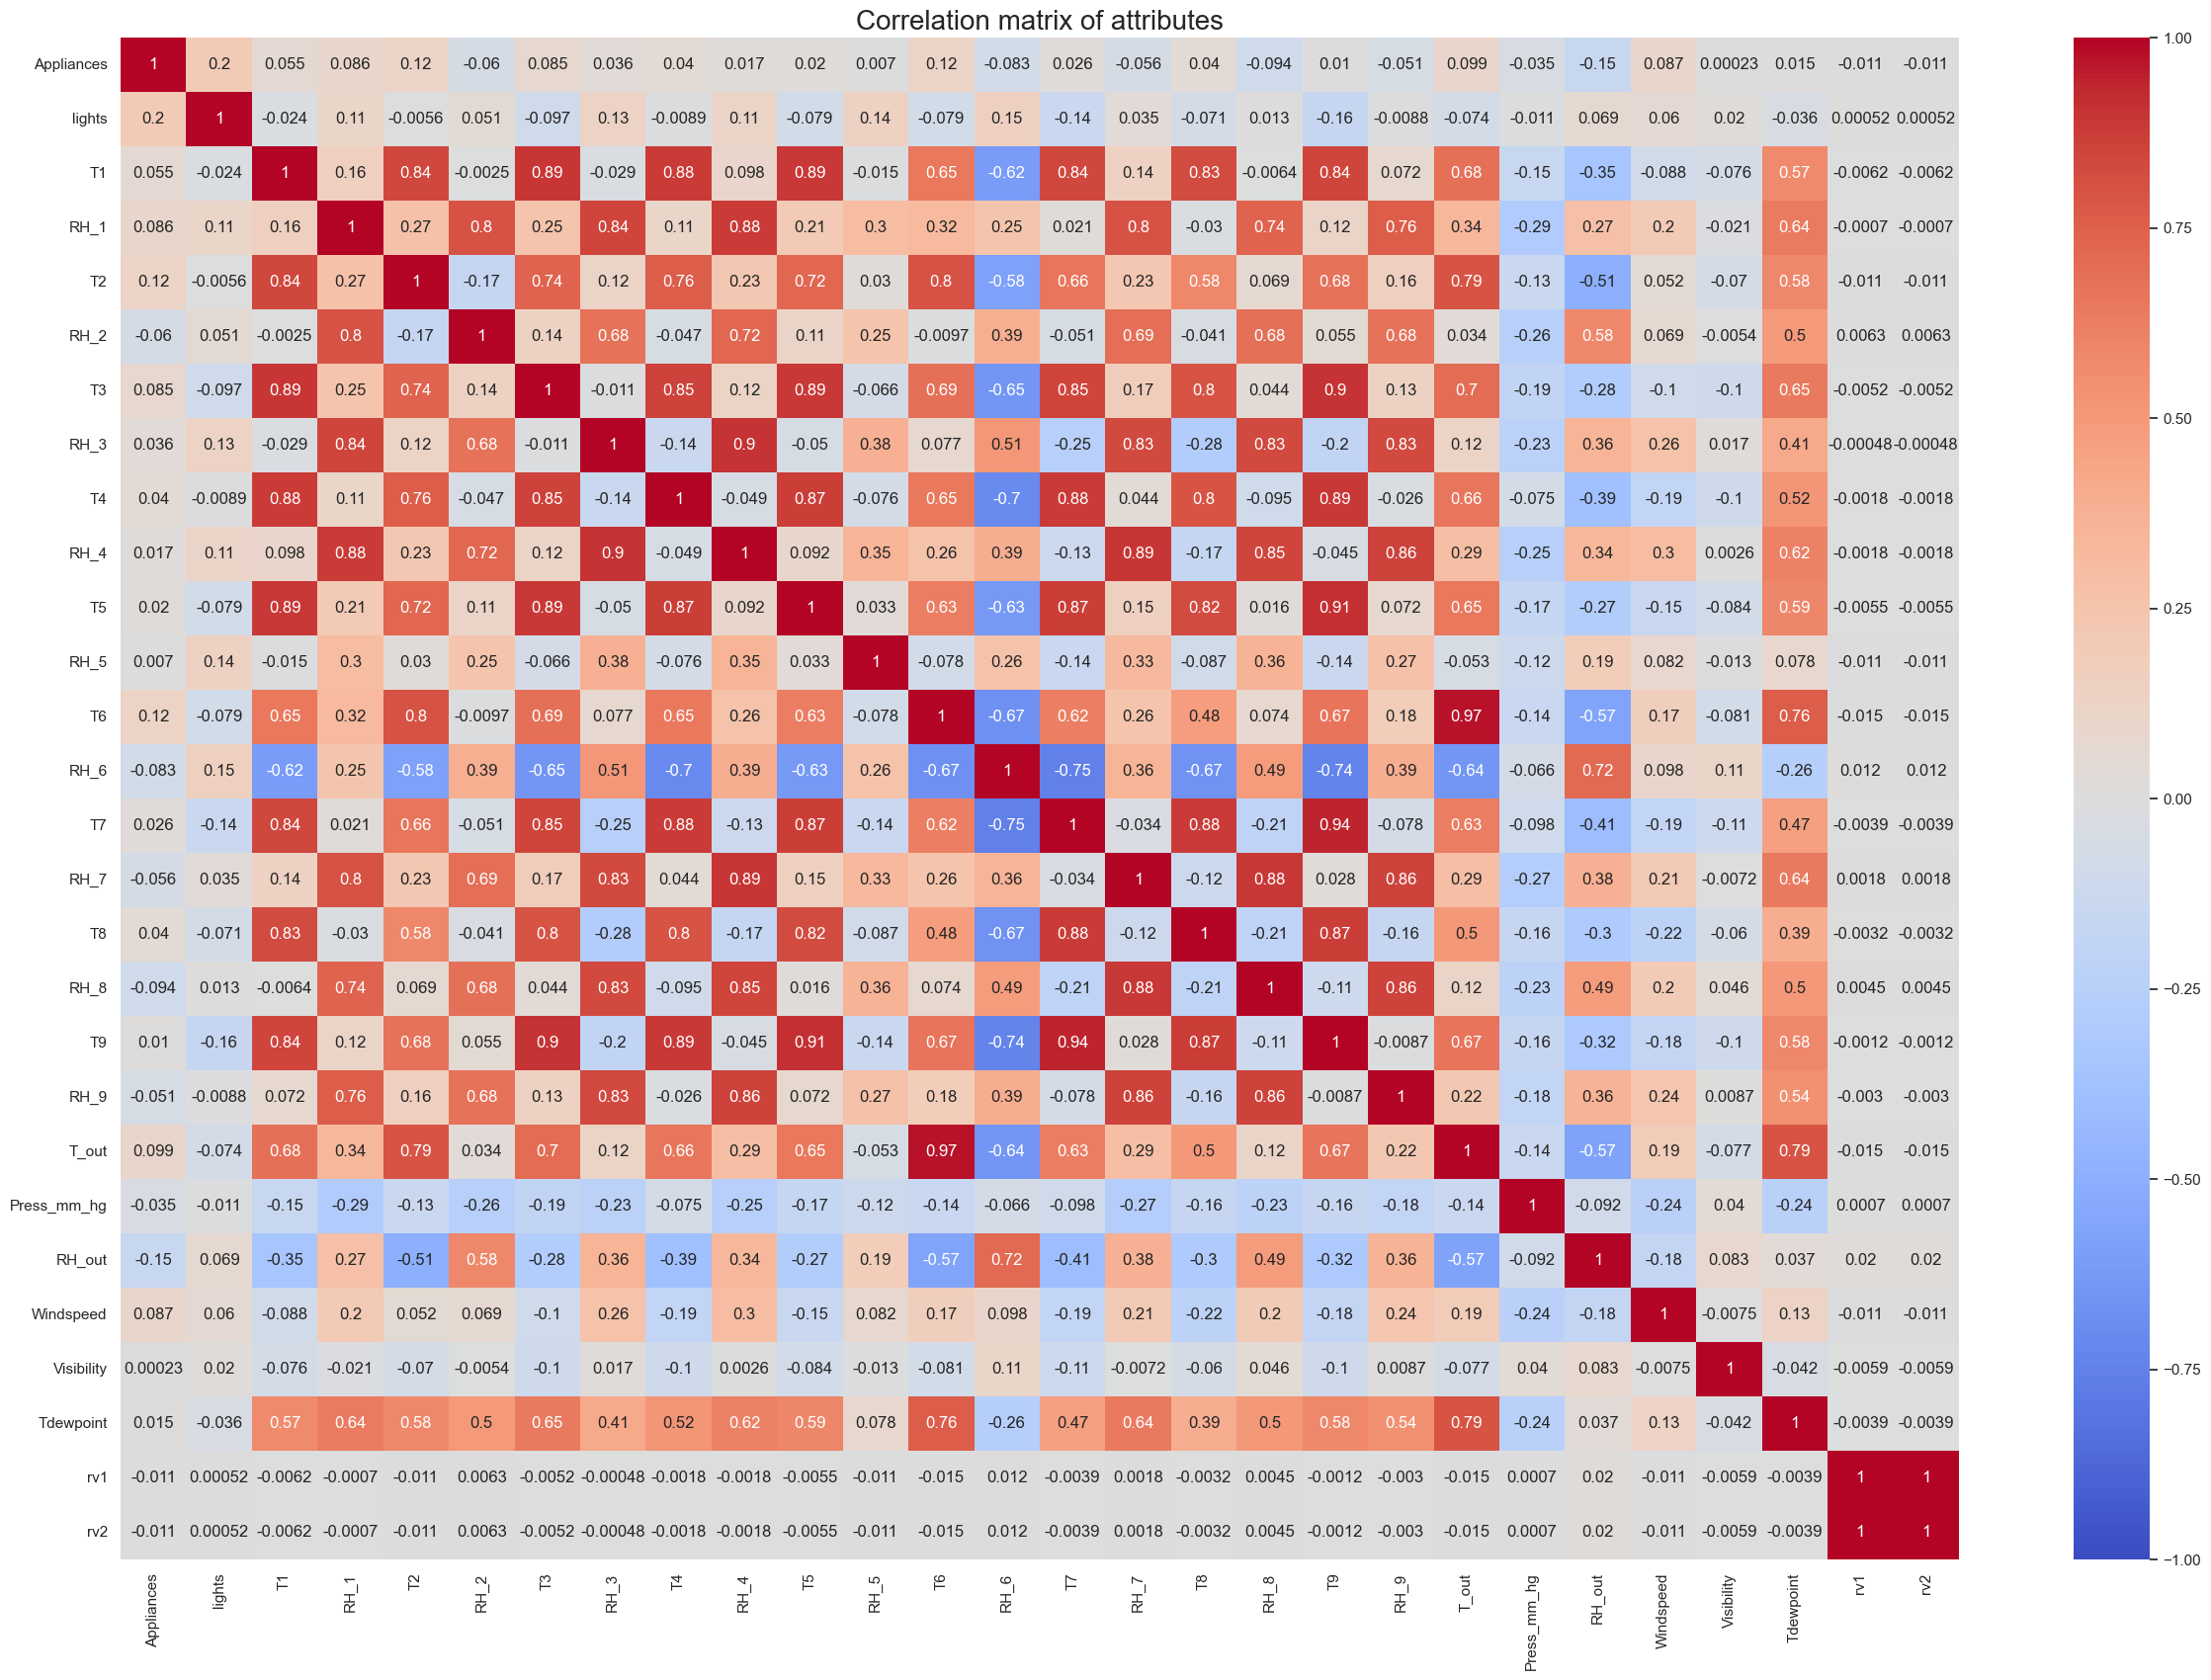

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

sns.set(style='white')
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix of attributes', fontsize=20)
plt.show()

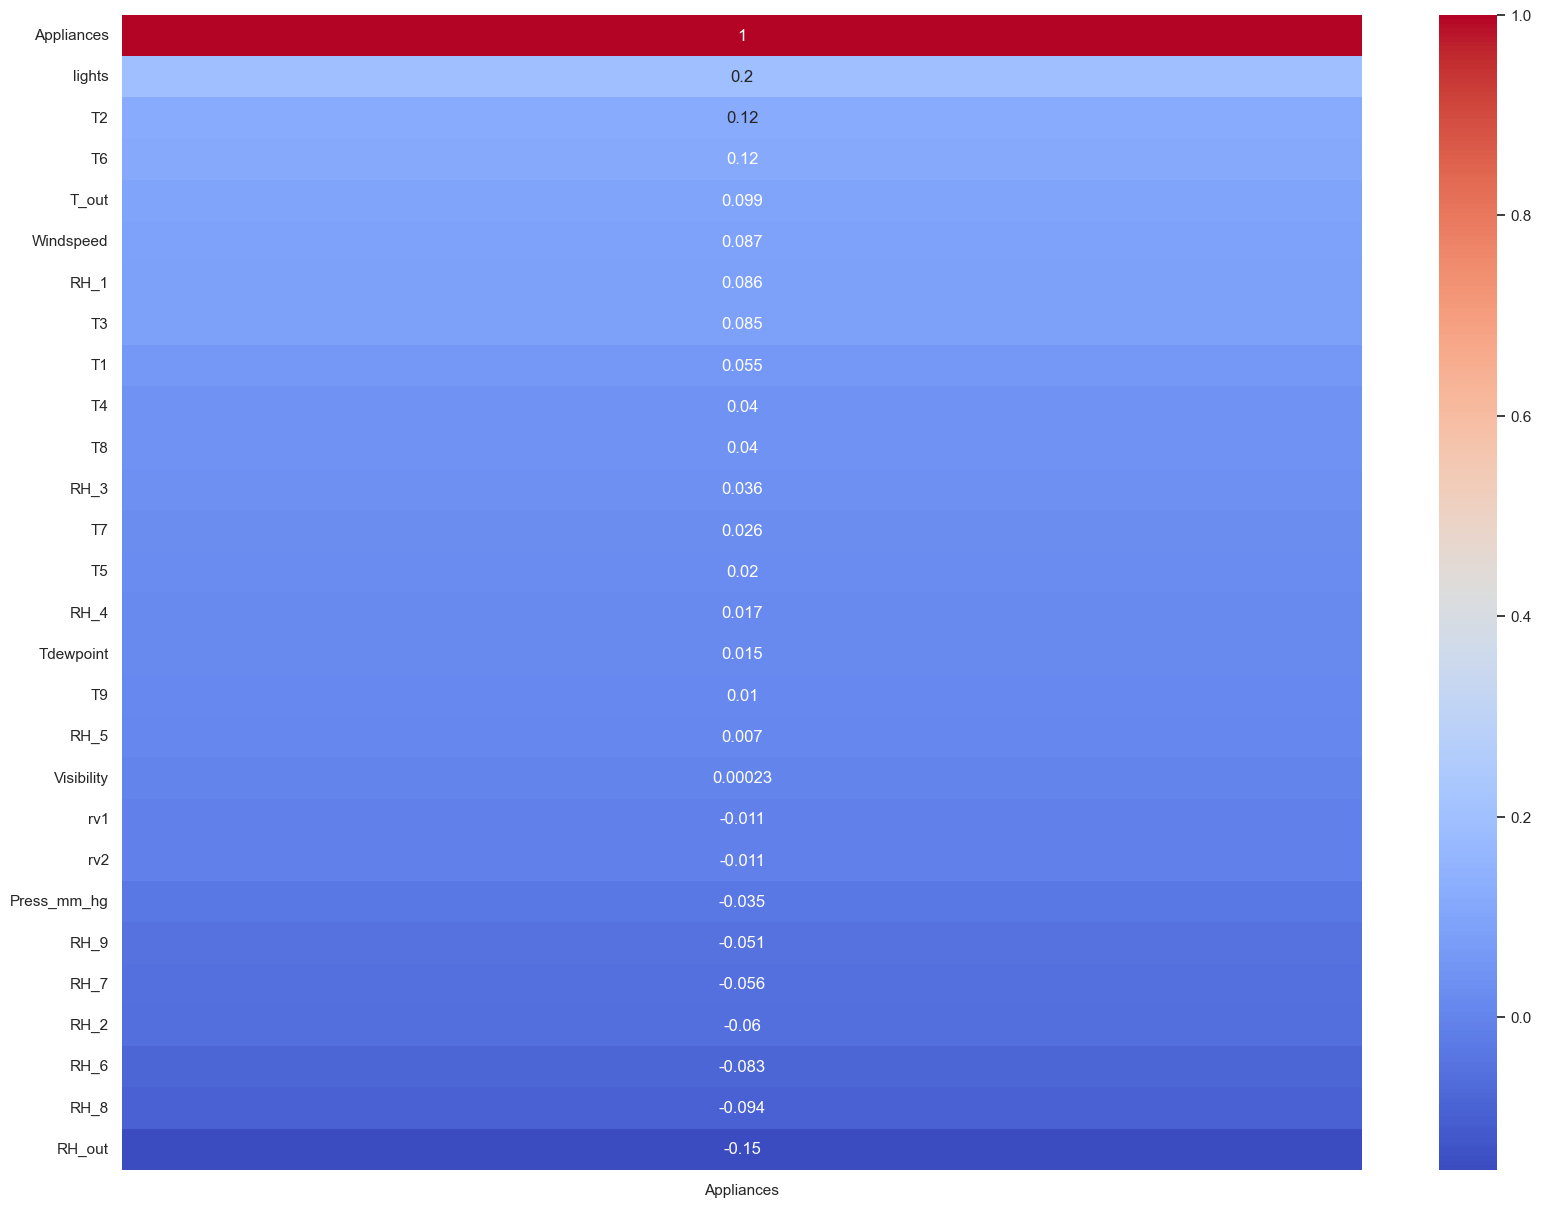

In [113]:
cm = corr_matrix[['Appliances']].sort_values(by='Appliances', ascending=False)
plt.figure(figsize=(20,15))
sns.heatmap(cm, cmap='coolwarm', annot=True)
plt.show()

In [114]:
cm

,Appliances
Appliances,1.000000
lights,0.197278
T2,0.120075
T6,0.117635
T_out,0.099152
Windspeed,0.087127
RH_1,0.086039
T3,0.085068
T1,0.055447
T4,0.040276


In [115]:
from scipy.stats import spearmanr

correlations = {}
for col in df.columns[:-1]:
    rho, p = spearmanr(df[col].values, df['Appliances'].values)
    correlations[col] = abs(rho)

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

for feature, corr in sorted_correlations:
    print(f"Spearman correlation between Appliances and {feature} is {corr:.4f}")

Spearman correlation between Appliances and Appliances is 1.0000
Spearman correlation between Appliances and T2 is 0.3051
Spearman correlation between Appliances and lights is 0.3024
Spearman correlation between Appliances and RH_out is 0.2691
Spearman correlation between Appliances and T1 is 0.2440
Spearman correlation between Appliances and T6 is 0.2425
Spearman correlation between Appliances and T8 is 0.2361
Spearman correlation between Appliances and RH_6 is 0.2297
Spearman correlation between Appliances and RH_8 is 0.2172
Spearman correlation between Appliances and T3 is 0.2169
Spearman correlation between Appliances and T_out is 0.2155
Spearman correlation between Appliances and T4 is 0.2072
Spearman correlation between Appliances and T5 is 0.1859
Spearman correlation between Appliances and T7 is 0.1819
Spearman correlation between Appliances and T9 is 0.1670
Spearman correlation between Appliances and RH_9 is 0.1646
Spearman correlation between Appliances and RH_2 is 0.1197
Spea

In [116]:
import pandas as pd
import statsmodels.api as sm


# Separate the target variable from the predictors
y = df['Appliances']
X = df.drop(['Appliances'], axis=1)

# Perform backward selection
cols = list(X.columns)
pmax = 1
while (len(cols) > 0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break

# Print the selected features
print(cols)

['lights', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T6', 'RH_6', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']


In [117]:
cols = list(X.columns)
selected_features = []
while (len(cols) > 0):
    remaining_features = list(set(cols) - set(selected_features))
    pval = []
    for feature in remaining_features:
        X_1 = X[selected_features + [feature]]
        X_1 = sm.add_constant(X_1)
        model = sm.OLS(y, X_1).fit()
        p = model.pvalues[-1]
        pval.append(p)
    min_pval = min(pval)
    if (min_pval < 0.05):
        selected_features.append(remaining_features[pval.index(min_pval)])
    else:
        break

# Print the selected features
print(selected_features)

['lights', 'RH_out', 'RH_1', 'RH_8', 'RH_2', 'RH_7', 'Windspeed', 'T3', 'T9', 'T2', 'T8', 'T6', 'RH_3', 'T_out', 'T4', 'RH_6', 'Tdewpoint', 'Visibility', 'RH_9']


In [118]:
final_df = df[['T2', 'T3', 'T4', 'T6', 'T8', 'T9', 'T_out',  'RH_1', 'RH_2', 'RH_3', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'RH_out', 'lights', 'Tdewpoint', 'Visibility', 'Windspeed']]

final_df

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed
0,19.20,19.79,19.00,7.03,18.20,17.03,6.60,47.60,44.79,44.73,84.26,41.63,48.90,45.53,92.00,30,5.30,63.00,7.00
1,19.20,19.79,19.00,6.83,18.20,17.07,6.48,46.69,44.72,44.79,84.06,41.56,48.86,45.56,92.00,30,5.20,59.17,6.67
2,19.20,19.79,18.93,6.56,18.20,17.00,6.37,46.30,44.63,44.93,83.16,41.43,48.73,45.50,92.00,30,5.10,55.33,6.33
3,19.20,19.79,18.89,6.43,18.10,17.00,6.25,46.07,44.59,45.00,83.42,41.29,48.59,45.40,92.00,40,5.00,51.50,6.00
4,19.20,19.79,18.89,6.37,18.10,17.00,6.13,46.33,44.53,45.00,84.89,41.23,48.59,45.40,92.00,40,4.90,47.67,5.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.89,27.20,24.70,24.80,24.70,23.20,22.73,46.56,42.03,41.16,1.00,44.50,50.07,46.79,55.67,0,13.33,23.67,3.33
19731,25.75,27.13,24.70,24.20,24.70,23.20,22.60,46.50,42.08,41.22,1.00,44.41,49.79,46.79,56.00,0,13.30,24.50,3.50
19732,25.63,27.05,24.70,23.63,24.70,23.20,22.47,46.60,42.77,41.69,1.00,44.40,49.66,46.79,56.33,10,13.27,25.33,3.67
19733,25.41,26.89,24.70,22.43,24.66,23.20,22.33,46.99,43.04,41.29,1.00,44.30,49.52,46.82,56.67,10,13.23,26.17,3.83


In [119]:
len(final_df.columns)

19

In [120]:
final_df.shape

(19735, 19)

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scale = sc.fit_transform(final_df)

#standardization data after performing standardization
scaled_df=pd.DataFrame(data=X_scale, columns = final_df.columns)
scaled_df

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed
0,-0.520394,-1.235046,-0.908218,-0.144643,-1.957492,-1.218971,-0.152647,1.844682,1.073692,1.686146,0.951907,1.220519,1.141588,0.958137,0.822081,3.301264,0.366976,2.091595,1.207702
1,-0.520394,-1.235046,-0.908218,-0.177483,-1.957492,-1.199117,-0.175215,1.615990,1.056492,1.704582,0.945486,1.206831,1.133931,0.965364,0.822081,3.301264,0.343135,1.766865,1.073071
2,-0.520394,-1.235046,-0.942484,-0.221816,-1.957492,-1.233862,-0.195902,1.517979,1.034377,1.747600,0.916592,1.181411,1.109047,0.950911,0.822081,3.301264,0.319295,1.441288,0.934360
3,-0.520394,-1.235046,-0.962064,-0.243162,-2.008613,-1.233862,-0.218470,1.460178,1.024548,1.769109,0.924939,1.154036,1.082249,0.926823,0.822081,4.561378,0.295454,1.116558,0.799729
4,-0.520394,-1.235046,-0.962064,-0.253014,-2.008613,-1.233862,-0.241038,1.525519,1.009805,1.769109,0.972132,1.142303,1.082249,0.926823,0.822081,4.561378,0.271614,0.791829,0.665098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2.530302,2.458740,1.882029,2.773156,1.365417,1.843579,2.880862,1.583320,0.395507,0.589198,-1.721052,1.781717,1.365546,1.261650,-1.616059,-0.479080,2.281368,-1.243030,-0.289560
19731,2.466461,2.423846,1.882029,2.674637,1.365417,1.843579,2.856414,1.568241,0.407793,0.607634,-1.721052,1.764118,1.311950,1.261650,-1.593912,-0.479080,2.274216,-1.172658,-0.220204
19732,2.411740,2.383967,1.882029,2.581044,1.365417,1.843579,2.831965,1.593372,0.577339,0.752050,-1.721052,1.762163,1.287065,1.261650,-1.571765,0.781035,2.267063,-1.102286,-0.150849
19733,2.311418,2.304210,1.882029,2.384007,1.344968,1.843579,2.805636,1.691383,0.643683,0.629143,-1.721052,1.742609,1.260267,1.268876,-1.548948,0.781035,2.257527,-1.031066,-0.085573


In [122]:
scaled_df.head()

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed
0,-0.520394,-1.235046,-0.908218,-0.144643,-1.957492,-1.218971,-0.152647,1.844682,1.073692,1.686146,0.951907,1.220519,1.141588,0.958137,0.822081,3.301264,0.366976,2.091595,1.207702
1,-0.520394,-1.235046,-0.908218,-0.177483,-1.957492,-1.199117,-0.175215,1.615990,1.056492,1.704582,0.945486,1.206831,1.133931,0.965364,0.822081,3.301264,0.343135,1.766865,1.073071
2,-0.520394,-1.235046,-0.942484,-0.221816,-1.957492,-1.233862,-0.195902,1.517979,1.034377,1.747600,0.916592,1.181411,1.109047,0.950911,0.822081,3.301264,0.319295,1.441288,0.934360
3,-0.520394,-1.235046,-0.962064,-0.243162,-2.008613,-1.233862,-0.218470,1.460178,1.024548,1.769109,0.924939,1.154036,1.082249,0.926823,0.822081,4.561378,0.295454,1.116558,0.799729
4,-0.520394,-1.235046,-0.962064,-0.253014,-2.008613,-1.233862,-0.241038,1.525519,1.009805,1.769109,0.972132,1.142303,1.082249,0.926823,0.822081,4.561378,0.271614,0.791829,0.665098


In [123]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

cutoffs = [0, 60, np.inf]

# Create a list of class labels
class_labels = [0, 1]

# Map the target variable values to the corresponding classes
scaled_df['Appliances'] = pd.cut(df['Appliances'], bins=cutoffs, labels=class_labels)
scaled_df


,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed,Appliances
0,-0.520394,-1.235046,-0.908218,-0.144643,-1.957492,-1.218971,-0.152647,1.844682,1.073692,1.686146,0.951907,1.220519,1.141588,0.958137,0.822081,3.301264,0.366976,2.091595,1.207702,0
1,-0.520394,-1.235046,-0.908218,-0.177483,-1.957492,-1.199117,-0.175215,1.615990,1.056492,1.704582,0.945486,1.206831,1.133931,0.965364,0.822081,3.301264,0.343135,1.766865,1.073071,0
2,-0.520394,-1.235046,-0.942484,-0.221816,-1.957492,-1.233862,-0.195902,1.517979,1.034377,1.747600,0.916592,1.181411,1.109047,0.950911,0.822081,3.301264,0.319295,1.441288,0.934360,0
3,-0.520394,-1.235046,-0.962064,-0.243162,-2.008613,-1.233862,-0.218470,1.460178,1.024548,1.769109,0.924939,1.154036,1.082249,0.926823,0.822081,4.561378,0.295454,1.116558,0.799729,0
4,-0.520394,-1.235046,-0.962064,-0.253014,-2.008613,-1.233862,-0.241038,1.525519,1.009805,1.769109,0.972132,1.142303,1.082249,0.926823,0.822081,4.561378,0.271614,0.791829,0.665098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2.530302,2.458740,1.882029,2.773156,1.365417,1.843579,2.880862,1.583320,0.395507,0.589198,-1.721052,1.781717,1.365546,1.261650,-1.616059,-0.479080,2.281368,-1.243030,-0.289560,1
19731,2.466461,2.423846,1.882029,2.674637,1.365417,1.843579,2.856414,1.568241,0.407793,0.607634,-1.721052,1.764118,1.311950,1.261650,-1.593912,-0.479080,2.274216,-1.172658,-0.220204,1
19732,2.411740,2.383967,1.882029,2.581044,1.365417,1.843579,2.831965,1.593372,0.577339,0.752050,-1.721052,1.762163,1.287065,1.261650,-1.571765,0.781035,2.267063,-1.102286,-0.150849,1
19733,2.311418,2.304210,1.882029,2.384007,1.344968,1.843579,2.805636,1.691383,0.643683,0.629143,-1.721052,1.742609,1.260267,1.268876,-1.548948,0.781035,2.257527,-1.031066,-0.085573,1


In [124]:
scaled_df['Appliances'].value_counts()

0    10744
1     8991
Name: Appliances, dtype: int64

In [125]:
scaled_df.head()

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed,Appliances
0,-0.520394,-1.235046,-0.908218,-0.144643,-1.957492,-1.218971,-0.152647,1.844682,1.073692,1.686146,0.951907,1.220519,1.141588,0.958137,0.822081,3.301264,0.366976,2.091595,1.207702,0
1,-0.520394,-1.235046,-0.908218,-0.177483,-1.957492,-1.199117,-0.175215,1.615990,1.056492,1.704582,0.945486,1.206831,1.133931,0.965364,0.822081,3.301264,0.343135,1.766865,1.073071,0
2,-0.520394,-1.235046,-0.942484,-0.221816,-1.957492,-1.233862,-0.195902,1.517979,1.034377,1.747600,0.916592,1.181411,1.109047,0.950911,0.822081,3.301264,0.319295,1.441288,0.934360,0
3,-0.520394,-1.235046,-0.962064,-0.243162,-2.008613,-1.233862,-0.218470,1.460178,1.024548,1.769109,0.924939,1.154036,1.082249,0.926823,0.822081,4.561378,0.295454,1.116558,0.799729,0
4,-0.520394,-1.235046,-0.962064,-0.253014,-2.008613,-1.233862,-0.241038,1.525519,1.009805,1.769109,0.972132,1.142303,1.082249,0.926823,0.822081,4.561378,0.271614,0.791829,0.665098,0


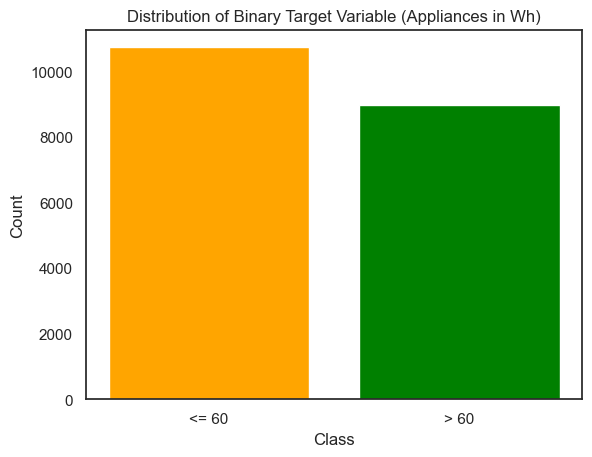

In [126]:
import matplotlib.pyplot as plt
counts = scaled_df['Appliances'].value_counts()

# Create a bar plot
plt.bar(counts.index, counts.values, color=['Orange', 'Green'])
plt.xticks([0, 1], ['<= 60', '> 60'])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Binary Target Variable (Appliances in Wh)')
plt.show()


In [127]:
X = scaled_df.iloc[:, :-1]
y = scaled_df['Appliances']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [128]:
X_train.head()

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed
2133,-0.520394,-0.935954,-0.859266,0.523643,-2.003501,-1.149480,0.543198,1.316932,1.147408,1.550948,1.406817,1.586178,1.352147,1.721736,0.385860,-0.47908,0.998749,-1.257444,1.411689
19730,2.530302,2.458740,1.882029,2.773156,1.365417,1.843579,2.880862,1.583320,0.395507,0.589198,-1.721052,1.781717,1.365546,1.261650,-1.616059,-0.47908,2.281368,-1.243030,-0.289560
3288,0.542106,-0.153330,0.560333,-0.226742,-0.745908,-0.439683,-0.152647,1.048031,0.533110,1.633910,0.219941,-0.208873,-0.307442,0.958137,-1.057025,-0.47908,-0.848890,0.141522,1.615675
7730,-1.432410,-0.831272,-1.206823,-0.840843,-0.781693,-0.543919,-0.998945,-0.552811,0.125216,-0.639875,0.812897,-0.662524,-0.066256,-0.200509,0.978449,-0.47908,-0.603333,0.876614,-1.240137
8852,-1.478011,-0.985803,-0.663459,-1.408968,0.342983,-0.275884,-1.557502,-1.248938,-0.154904,-0.689038,0.446915,-0.351617,-0.703676,-0.352265,0.844227,-0.47908,-1.356693,-0.367193,-0.966795


In [129]:
X_test.head()

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed
8980,-1.177046,-0.985803,-0.536185,-1.101918,0.532133,-0.097194,-1.061007,-1.221294,-0.309707,-0.719765,0.295706,-0.337929,-0.609881,-0.607601,0.575783,-0.479080,-0.896571,2.091595,-0.697533
2754,0.432664,-0.317831,-0.159257,-0.883535,-0.720347,-1.586279,-0.886105,3.226884,1.213752,3.068853,1.363798,0.772734,0.885089,0.637763,0.687859,0.781035,-0.610485,-0.960694,-0.424191
9132,-1.236327,-0.297891,-0.276741,-1.343289,0.036253,-0.047558,-1.356271,-1.196163,0.026928,-1.242121,-0.118111,-1.583515,-0.632851,-0.785855,0.218082,-0.479080,-1.468743,2.261166,-0.832164
14359,1.618285,-0.118436,0.751245,0.533495,-0.423842,0.399167,0.270502,0.193578,-1.371213,-0.710547,-1.422487,-0.977343,-0.927634,-0.720816,-0.598657,-0.479080,-0.009704,0.141522,0.461111
8875,-1.769857,-1.130364,-0.780943,-1.418820,0.036253,-0.241139,-1.482275,-1.289147,-0.071359,-0.873399,0.533595,-0.259713,-0.640508,-0.205327,0.911338,-0.479080,-1.242258,0.890180,-0.016218


In [130]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

acc_logreg_train = accuracy_score(y_train, y_train_pred)
acc_logreg = accuracy_score(y_test, y_pred)

print('Logistic Regression of Training Set: {:.2f}%'.format(acc_logreg_train*100))
print('Logistic Regression of Testing Set: {:.2f}%'.format(acc_logreg*100))
print('\n')

report_train = classification_report(y_train, y_train_pred, target_names=['0', '1'])
report_test = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Classification report of training test:")
print(report_train)
print('\n')
print("Classification report of testing test:")
print(report_test)

y_scores_list1 =[]
test_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_logreg.tolist())

Logistic Regression of Training Set: 76.06%
Logistic Regression of Testing Set: 76.21%


Classification report of training test:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      8617
           1       0.75      0.72      0.73      7171

    accuracy                           0.76     15788
   macro avg       0.76      0.76      0.76     15788
weighted avg       0.76      0.76      0.76     15788



Classification report of testing test:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      2127
           1       0.75      0.72      0.74      1820

    accuracy                           0.76      3947
   macro avg       0.76      0.76      0.76      3947
weighted avg       0.76      0.76      0.76      3947



In [132]:
# Naive bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(X_train, y_train)

y_train_pred = nb.predict(X_train)
y_pred = nb.predict(X_test)

acc_nb_train = accuracy_score(y_train, y_train_pred)
acc_nb = accuracy_score(y_test, y_pred)

print('Naive Bayes of Training Set: {:.2f}%'.format(acc_nb_train*100))
print('Naive Bayes of Testing Set: {:.2f}%'.format(acc_nb*100))
print('\n')

report_train = classification_report(y_train, y_train_pred, target_names=['0', '1'])
report_test = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Classification report of training test:")
print(report_train)
print('\n')
print("Classification report of testing test:")
print(report_test)

test_prob_nb = nb.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_nb.tolist())

Naive Bayes of Training Set: 66.66%
Naive Bayes of Testing Set: 67.37%


Classification report of training test:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      8617
           1       0.64      0.60      0.62      7171

    accuracy                           0.67     15788
   macro avg       0.66      0.66      0.66     15788
weighted avg       0.67      0.67      0.67     15788



Classification report of testing test:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      2127
           1       0.66      0.60      0.63      1820

    accuracy                           0.67      3947
   macro avg       0.67      0.67      0.67      3947
weighted avg       0.67      0.67      0.67      3947



In [133]:
# knn 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_pred = knn.predict(X_test)

acc_knn_train = accuracy_score(y_train, y_train_pred)
acc_knn = accuracy_score(y_test, y_pred)

print('K-Nearest Neighbors of Training Set: {:.2f}%'.format(acc_knn_train*100))
print('K-Nearest Neighbors of Testing Set: {:.2f}%'.format(acc_knn*100))
print('\n')

report_train = classification_report(y_train, y_train_pred, target_names=['0', '1'])
report_test = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Classification report of training test:")
print(report_train)
print('\n')
print("Classification report of testing test:")
print(report_test)

test_prob_knn = knn.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_knn.tolist())

K-Nearest Neighbors of Training Set: 92.29%
K-Nearest Neighbors of Testing Set: 87.36%


Classification report of training test:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8617
           1       0.93      0.90      0.91      7171

    accuracy                           0.92     15788
   macro avg       0.92      0.92      0.92     15788
weighted avg       0.92      0.92      0.92     15788



Classification report of testing test:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      2127
           1       0.88      0.84      0.86      1820

    accuracy                           0.87      3947
   macro avg       0.87      0.87      0.87      3947
weighted avg       0.87      0.87      0.87      3947



In [134]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

acc_dt_train = accuracy_score(y_train, y_train_pred)
acc_dt = accuracy_score(y_test, y_pred)

print('Decision Tree of Training Set: {:.2f}%'.format(acc_dt_train*100))
print('Decision Tree of Testing Set: {:.2f}%'.format(acc_dt*100))
print('\n')

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report of training test:")
print(report_train)
print('\n')
print("Classification report of testing test:")
print(report_test)


Decision Tree of Training Set: 100.00%
Decision Tree of Testing Set: 85.63%


Classification report of training test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8617
           1       1.00      1.00      1.00      7171

    accuracy                           1.00     15788
   macro avg       1.00      1.00      1.00     15788
weighted avg       1.00      1.00      1.00     15788



Classification report of testing test:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2127
           1       0.85      0.84      0.84      1820

    accuracy                           0.86      3947
   macro avg       0.86      0.85      0.86      3947
weighted avg       0.86      0.86      0.86      3947



In [135]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

acc_rf_train = accuracy_score(y_train, y_train_pred)
acc_rf = accuracy_score(y_test, y_pred)

print('Random Forest of Training Set: {:.2f}%'.format(acc_rf_train*100))
print('Random Forest of Testing Set: {:.2f}%'.format(acc_rf*100))
print('\n')

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report of training test:")
print(report_train)
print('\n')
print("Classification report: of Testing test:")
print(report_test)

test_prob_rf = rf.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_rf.tolist())

Random Forest of Training Set: 100.00%
Random Forest of Testing Set: 89.56%


Classification report of training test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8617
           1       1.00      1.00      1.00      7171

    accuracy                           1.00     15788
   macro avg       1.00      1.00      1.00     15788
weighted avg       1.00      1.00      1.00     15788



Classification report: of Testing test:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2127
           1       0.89      0.88      0.89      1820

    accuracy                           0.90      3947
   macro avg       0.90      0.89      0.89      3947
weighted avg       0.90      0.90      0.90      3947



In [136]:
#GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# create gradient boosting classifier
gb = GradientBoostingClassifier()

# fit the classifier on the training data
gb.fit(X_train, y_train)

# make predictions on the training and testing sets
y_train_pred = gb.predict(X_train)
y_pred = gb.predict(X_test)

# calculate accuracy scores for the training and testing sets
acc_gb_train = accuracy_score(y_train, y_train_pred)
acc_gb = accuracy_score(y_test, y_pred)

# print the accuracy scores
print('Gradient Boosting of Training Set: {:.2f}%'.format(acc_gb_train*100))
print('Gradient Boosting of Testing Set: {:.2f}%'.format(acc_gb*100))
print('\n')

# print classification reports for the training and testing sets
report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report of training set:")
print(report_train)
print('\n')
print("Classification report of testing set:")
print(report_test)


Gradient Boosting of Training Set: 81.77%
Gradient Boosting of Testing Set: 81.10%


Classification report of training set:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      8617
           1       0.81      0.78      0.79      7171

    accuracy                           0.82     15788
   macro avg       0.82      0.81      0.82     15788
weighted avg       0.82      0.82      0.82     15788



Classification report of testing set:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      2127
           1       0.81      0.77      0.79      1820

    accuracy                           0.81      3947
   macro avg       0.81      0.81      0.81      3947
weighted avg       0.81      0.81      0.81      3947



In [137]:
#Support Vector Machine

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# create SVM classifier
svm = SVC()

# fit the classifier on the training data
svm.fit(X_train, y_train)

# make predictions on the training and testing sets
y_train_pred = svm.predict(X_train)
y_pred = svm.predict(X_test)

# calculate accuracy scores for the training and testing sets
acc_svm_train = accuracy_score(y_train, y_train_pred)
acc_svm = accuracy_score(y_test, y_pred)

# print the accuracy scores
print('Support Vector Machine of Training Set: {:.2f}%'.format(acc_svm_train*100))
print('Support Vector Machine of Testing Set: {:.2f}%'.format(acc_svm*100))
print('\n')

# print classification reports for the training and testing sets
report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report of training set:")
print(report_train)
print('\n')
print("Classification report of testing set:")
print(report_test)


Support Vector Machine of Training Set: 84.08%
Support Vector Machine of Testing Set: 83.30%


Classification report of training set:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      8617
           1       0.84      0.80      0.82      7171

    accuracy                           0.84     15788
   macro avg       0.84      0.84      0.84     15788
weighted avg       0.84      0.84      0.84     15788



Classification report of testing set:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2127
           1       0.84      0.79      0.81      1820

    accuracy                           0.83      3947
   macro avg       0.83      0.83      0.83      3947
weighted avg       0.83      0.83      0.83      3947



In [138]:
# MULTI LAYER PERCEPTRON

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
alpha=0.0001, batch_size='auto', learning_rate='constant',
learning_rate_init=0.001, max_iter=200, shuffle=True,
random_state=42, tol=0.0001)
mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_pred = mlp.predict(X_test)

acc_mlp_train = accuracy_score(y_train, y_train_pred)
acc_mlp = accuracy_score(y_test, y_pred)

print('Multi-layer Perceptron of Training Set: {:.2f}%'.format(acc_mlp_train*100))
print('Multi-layer Perceptron of Testing Set: {:.2f}%'.format(acc_mlp*100))
print('\n')

report_train = classification_report(y_train, y_train_pred)
report_test = classification_report(y_test, y_pred)
print("Classification report of training test:")
print(report_train)
print('\n')
print("Classification report: of Testing test:")
print(report_test)

test_prob_mlp = mlp.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_mlp.tolist())

Multi-layer Perceptron of Training Set: 88.33%
Multi-layer Perceptron of Testing Set: 86.07%


Classification report of training test:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      8617
           1       0.88      0.86      0.87      7171

    accuracy                           0.88     15788
   macro avg       0.88      0.88      0.88     15788
weighted avg       0.88      0.88      0.88     15788



Classification report: of Testing test:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2127
           1       0.86      0.84      0.85      1820

    accuracy                           0.86      3947
   macro avg       0.86      0.86      0.86      3947
weighted avg       0.86      0.86      0.86      3947



In [139]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

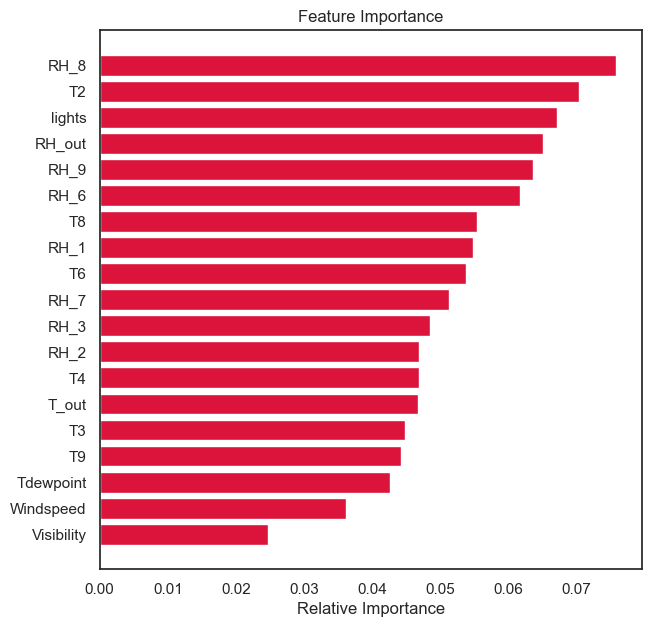

In [140]:
feature_importance = rf.feature_importances_
feature_names = X.columns.tolist()  # Get the names of the features from the input data X
sorted_idx = np.argsort(feature_importance)

# Create a horizontal bar chart to display the relative feature importance
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(7, 7))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.yticks(pos, [feature_names[i] for i in sorted_idx])  # Set the y-tick labels to the feature names
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.show()


In [141]:
X_train

,T2,T3,T4,T6,T8,T9,T_out,RH_1,RH_2,RH_3,RH_6,RH_7,RH_8,RH_9,RH_out,lights,Tdewpoint,Visibility,Windspeed
2133,-0.520394,-0.935954,-0.859266,0.523643,-2.003501,-1.149480,0.543198,1.316932,1.147408,1.550948,1.406817,1.586178,1.352147,1.721736,0.385860,-0.47908,0.998749,-1.257444,1.411689
19730,2.530302,2.458740,1.882029,2.773156,1.365417,1.843579,2.880862,1.583320,0.395507,0.589198,-1.721052,1.781717,1.365546,1.261650,-1.616059,-0.47908,2.281368,-1.243030,-0.289560
3288,0.542106,-0.153330,0.560333,-0.226742,-0.745908,-0.439683,-0.152647,1.048031,0.533110,1.633910,0.219941,-0.208873,-0.307442,0.958137,-1.057025,-0.47908,-0.848890,0.141522,1.615675
7730,-1.432410,-0.831272,-1.206823,-0.840843,-0.781693,-0.543919,-0.998945,-0.552811,0.125216,-0.639875,0.812897,-0.662524,-0.066256,-0.200509,0.978449,-0.47908,-0.603333,0.876614,-1.240137
8852,-1.478011,-0.985803,-0.663459,-1.408968,0.342983,-0.275884,-1.557502,-1.248938,-0.154904,-0.689038,0.446915,-0.351617,-0.703676,-0.352265,0.844227,-0.47908,-1.356693,-0.367193,-0.966795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-0.433752,0.365096,0.315575,0.260926,1.094472,0.433913,0.405910,0.160908,0.655969,-0.074501,-0.185529,-0.253847,0.485026,-0.239051,-0.139619,-0.47908,0.493330,0.141522,1.073071
11964,0.756430,0.215550,0.212776,1.638547,1.109808,0.399167,1.859662,0.864575,0.405336,0.610707,-1.104017,0.913522,0.777895,0.659443,-0.922803,-0.47908,1.702044,0.141522,-0.832164
5390,-0.976402,-1.080515,-1.299831,-1.642130,-0.393169,-0.792100,-1.595115,-1.145901,-0.695486,-0.507750,0.908245,-1.053603,-0.236617,-0.501613,0.486526,-0.47908,-1.595098,2.063615,-0.150849
860,0.040497,-0.532180,0.119768,-1.101918,0.342983,-0.489320,-1.004587,-1.181084,-1.302412,-0.719765,1.355451,-0.899127,-0.661564,-0.019847,-1.034878,-0.47908,-1.866879,0.141522,-1.105506


In [142]:
# Constructing a bagged-tree classifier IN Decision tree CLASSIFIER

from sklearn import tree 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=18, random_state=3)
bag_clf.fit(X_train, y_train)

train_y_pred = bag_clf.predict(X_train)
test_y_pred = bag_clf.predict(X_test)

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Bagged Trees Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Bagged Trees Classifier Test Classification Report: \n\n', test_report)

test_prob_bag_clf = bag_clf.predict_proba(X_test)[:, 1]
y_scores_list1.append(test_prob_bag_clf.tolist())

Bagged Trees Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8617
           1       1.00      0.99      1.00      7171

    accuracy                           1.00     15788
   macro avg       1.00      1.00      1.00     15788
weighted avg       1.00      1.00      1.00     15788
 


Bagged Trees Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.91      0.90      2127
           1       0.89      0.86      0.88      1820

    accuracy                           0.89      3947
   macro avg       0.89      0.88      0.89      3947
weighted avg       0.89      0.89      0.89      3947



In [143]:
# Constructing a bagged-tree classifier IN Random forest CLASSIFIER

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=10, random_state=42)
bag_rf = BaggingClassifier(base_estimator=rf, n_estimators=5, random_state=42)

# Define the hyperparameters to tune
param_grid = {
"base_estimator__max_depth": [2, 4, 6],
"base_estimator__min_samples_split": [2, 4, 6],
"base_estimator__min_samples_leaf": [1, 2, 4]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=bag_rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Accuracy in training: {grid_search.best_score_}")

# Make predictions on the testing data using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy in testing: {accuracy}")

Best hyperparameters: {'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 6}
Accuracy in training: 0.7804035103591785
Accuracy in testing: 0.7881935647327084


In [144]:
# Constructing a bagged-SVC classifier

bag_clf = BaggingClassifier(base_estimator=SVC(), n_estimators=30, random_state=3)
bag_clf.fit(X_train, y_train)

# Finding the predictions of the bagged-SVC classifier for train and test subsets

train_y_pred = bag_clf.predict(X_train)
test_y_pred = bag_clf.predict(X_test)

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Bagged SVC Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Bagged SVC Classifier Test Classification Report: \n\n', test_report)

Bagged SVC Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.83      0.88      0.86      8617
           1       0.84      0.79      0.82      7171

    accuracy                           0.84     15788
   macro avg       0.84      0.84      0.84     15788
weighted avg       0.84      0.84      0.84     15788
 


Bagged SVC Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.83      0.87      0.85      2127
           1       0.84      0.79      0.81      1820

    accuracy                           0.83      3947
   macro avg       0.83      0.83      0.83      3947
weighted avg       0.83      0.83      0.83      3947

